# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [38]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [39]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [40]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/VPS35


In [ ]:
# *********** OBSOLETE ***********
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- creates a button variable
# display(button) #<- displays the button in output

# def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     #Tk().update() #<- below
#     #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder)

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [41]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)

print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [42]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

/Users/Joseph/Desktop/VPS35
['/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00002.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00214.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00348.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00360.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00162.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00177.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00349.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00215.dat', '/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/M

# 5. Process Data Function (No input required, just run)

In [43]:
string=filelist[0]
print(string)
print('date')
print(string.split('/')[6].split('_')[0])
print(string.split('/')[6].split('_')[1])
# print(string.split('/')[6].split('_')[4].split('.')[0][1:5])

/Users/Joseph/Desktop/VPS35/cat-2(n4547)_OffFood/20221027_182438/MT15620_6x2_t72h20C_420s_A1027_MN8.00002.dat
date
20221027
182438


In [59]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        DF_Read['plate_id'] = f.split('/')[6].split('_')[1]
        DF_Read['date'] = f.split('/')[6].split('_')[0]
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm", "plate_id", "date"], as_index=False).mean()
    # DF_time_bin=DF_Total.groupby(["date", "plate_id"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [57]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[5])
ustrainnames=list(set(strainnames))
print(ustrainnames)
ustrainnames.sort()
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print(StrainNames)
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

['N2_OffFood', 'vps-35(hu68)_OffFood', 'cat-2(e1112)_OffFood', 'vps-35(ok1880)_OnFood', 'N2_OnFood', 'vps-35(ok1880)_OffFood', 'cat-2(e1112)_OnFood', 'vps-35(hu68)_OnFood', 'cat-2(n4547)_OffFood', 'cat-2(n4547)_OnFood']
{1: 'N2_OffFood', 2: 'N2_OnFood', 3: 'cat-2(e1112)_OffFood', 4: 'cat-2(e1112)_OnFood', 5: 'cat-2(n4547)_OffFood', 6: 'cat-2(n4547)_OnFood', 7: 'vps-35(hu68)_OffFood', 8: 'vps-35(hu68)_OnFood', 9: 'vps-35(ok1880)_OffFood', 10: 'vps-35(ok1880)_OnFood'}
done step 6.1


In [ ]:
# # ------------This Cell Is Now Defunct ----------------


# #Format: Strain_# = 'unique_identifier'

# ### Make into dictionary
# StrainNames = {
#     'Strain_1' : 'No_Parafilm',   #<- each strain will be designated to a unique identifier here
#     'Strain_2' : 'Yes_Parafilm',
# #     'Strain_3' : 'e1112_OffFood',
# #     'Strain_4' : 'e1112_OnFood',
# #     'Strain_5' : 'Test_OffFood',
# #     'Strain_6' : 'Test_OnFood',
# #     'Strain_5' : 'N2_NoFood',
# #     'Strain_6' : 'N2_Food',
# #     'Strain_9' : 'LX636_NoFood',  #<- empty entries are for those hardcore trackers that tracking this many strains
# #     'Strain_10' : 'LX636_Food',
# #     'Strain_11' : '',
# #     'Strain_12' : '',
# #     'Strain_13' : '',
# #     'Strain_14' : '',
# #     'Strain_15' : '',
# }
# #...etc, etc

# print('done step 6.1')
# print(StrainNames)

# Cell below is to run testing/debugging. Do not need to run (commented out)

In [ ]:


# DF_Read = pd.read_csv('/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
#                       , sep=' ', header = None, index_col=False) #<- imports and cleans data
# DF_Read["worm"]=1
# # print(DF_Read)
# DF_Total = DF_Read #<- more data cleaning
# DF_Total = DF_Total.rename( #<- more data cleaning
#             {0:'time',
#             1:'speed',
#             2: "x",
#             3: "y",
#             4: "angularspeed",
#             5: "pathlength",
#             6: "kink",
#             7: "bias",
#             8: "curve",
#             9: "dir",
#             10: "crab",
#             11: "length",
#             12: "midline",
#             13: "width",
#             14: "morphwidth",
#             15: "area"
#             }, axis=1)
# DF_Total["x_0"] = DF_Total.x - DF_Total.x.iloc[0]
# DF_Total["y_0"] = DF_Total.y - DF_Total.y.iloc[0]

# DF_Total["x_test"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
# DF_Total["y_test"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
# DF_Total["distance"]= 0
print(DF_Total)

# A_i = np.array(DF_Total['pathlength'][1:])
# A_i_1 = np.array(DF_Total['pathlength'][0:-1])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# DF_Total["distance"]=new_list
# print(DF_Total)



        


# A_i = np.array(DF_Total.iloc[1:,5])
# A_i_1 = np.array(DF_Total.iloc[0:-1,5])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# print(A_i)
# print(A_i_1)
# print(len(A_i))
# print(len(A_i_1))
# # resultS=pd.Series(result)
# # print(resultS.cumsum())
# # print(new_list)

# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
    
    
# import matplotlib.pyplot as plt
# plt.plot(new_list)

# 6.2 Process Data (just run this cell)

In [60]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

  0%|          | 0/10 [00:00<?, ?it/s]

This Strain has 779 worms tracked


0it [00:00, ?it/s]

Processing 1 of 779 worms
Processing 2 of 779 worms
Processing 3 of 779 worms
Processing 4 of 779 worms
Processing 5 of 779 worms
Processing 6 of 779 worms
Processing 7 of 779 worms
Processing 8 of 779 worms
Processing 9 of 779 worms
Processing 10 of 779 worms
Processing 11 of 779 worms
Processing 12 of 779 worms
Processing 13 of 779 worms
Processing 14 of 779 worms
Processing 15 of 779 worms
Processing 16 of 779 worms
Processing 17 of 779 worms
Processing 18 of 779 worms
Processing 19 of 779 worms
Processing 20 of 779 worms
Processing 21 of 779 worms
Processing 22 of 779 worms
Processing 23 of 779 worms
Processing 24 of 779 worms
Processing 25 of 779 worms
Processing 26 of 779 worms
Processing 27 of 779 worms
Processing 28 of 779 worms
Processing 29 of 779 worms
Processing 30 of 779 worms
Processing 31 of 779 worms
Processing 32 of 779 worms
Processing 33 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 34 of 779 worms
Processing 35 of 779 worms
Processing 36 of 779 worms
Processing 37 of 779 worms
Processing 38 of 779 worms
Processing 39 of 779 worms
Processing 40 of 779 worms
Processing 41 of 779 worms
Processing 42 of 779 worms
Processing 43 of 779 worms
Processing 44 of 779 worms
Processing 45 of 779 worms
Processing 46 of 779 worms
Processing 47 of 779 worms
Processing 48 of 779 worms
Processing 49 of 779 worms
Processing 50 of 779 worms
Processing 51 of 779 worms
Processing 52 of 779 worms
Processing 53 of 779 worms
Processing 54 of 779 worms
Processing 55 of 779 worms
Processing 56 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 779 worms
Processing 58 of 779 worms
Processing 59 of 779 worms
Processing 60 of 779 worms
Processing 61 of 779 worms
Processing 62 of 779 worms
Processing 63 of 779 worms
Processing 64 of 779 worms
Processing 65 of 779 worms
Processing 66 of 779 worms
Processing 67 of 779 worms
Processing 68 of 779 worms
Processing 69 of 779 worms
Processing 70 of 779 worms
Processing 71 of 779 worms
Processing 72 of 779 worms
Processing 73 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 779 worms
Processing 75 of 779 worms
Processing 76 of 779 worms
Processing 77 of 779 worms
Processing 78 of 779 worms
Processing 79 of 779 worms
Processing 80 of 779 worms
Processing 81 of 779 worms
Processing 82 of 779 worms
Processing 83 of 779 worms
Processing 84 of 779 worms
Processing 85 of 779 worms
Processing 86 of 779 worms
Processing 87 of 779 worms
Processing 88 of 779 worms
Processing 89 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 779 worms
Processing 91 of 779 worms
Processing 92 of 779 worms
Processing 93 of 779 worms
Processing 94 of 779 worms
Processing 95 of 779 worms
Processing 96 of 779 worms
Processing 97 of 779 worms
Processing 98 of 779 worms
Processing 99 of 779 worms
Processing 100 of 779 worms
Processing 101 of 779 worms
Processing 102 of 779 worms
Processing 103 of 779 worms
Processing 104 of 779 worms
Processing 105 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 779 worms
Processing 107 of 779 worms
Processing 108 of 779 worms
Processing 109 of 779 worms
Processing 110 of 779 worms
Processing 111 of 779 worms
Processing 112 of 779 worms
Processing 113 of 779 worms
Processing 114 of 779 worms
Processing 115 of 779 worms
Processing 116 of 779 worms
Processing 117 of 779 worms
Processing 118 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 119 of 779 worms
Processing 120 of 779 worms
Processing 121 of 779 worms
Processing 122 of 779 worms
Processing 123 of 779 worms
Processing 124 of 779 worms
Processing 125 of 779 worms
Processing 126 of 779 worms
Processing 127 of 779 worms
Processing 128 of 779 worms
Processing 129 of 779 worms
Processing 130 of 779 worms
Processing 131 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 132 of 779 worms
Processing 133 of 779 worms
Processing 134 of 779 worms
Processing 135 of 779 worms
Processing 136 of 779 worms
Processing 137 of 779 worms
Processing 138 of 779 worms
Processing 139 of 779 worms
Processing 140 of 779 worms
Processing 141 of 779 worms
Processing 142 of 779 worms
Processing 143 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 779 worms
Processing 145 of 779 worms
Processing 146 of 779 worms
Processing 147 of 779 worms
Processing 148 of 779 worms
Processing 149 of 779 worms
Processing 150 of 779 worms
Processing 151 of 779 worms
Processing 152 of 779 worms
Processing 153 of 779 worms
Processing 154 of 779 worms
Processing 155 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 779 worms
Processing 157 of 779 worms
Processing 158 of 779 worms
Processing 159 of 779 worms
Processing 160 of 779 worms
Processing 161 of 779 worms
Processing 162 of 779 worms
Processing 163 of 779 worms
Processing 164 of 779 worms
Processing 165 of 779 worms
Processing 166 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 167 of 779 worms
Processing 168 of 779 worms
Processing 169 of 779 worms
Processing 170 of 779 worms
Processing 171 of 779 worms
Processing 172 of 779 worms
Processing 173 of 779 worms
Processing 174 of 779 worms
Processing 175 of 779 worms
Processing 176 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 177 of 779 worms
Processing 178 of 779 worms
Processing 179 of 779 worms
Processing 180 of 779 worms
Processing 181 of 779 worms
Processing 182 of 779 worms
Processing 183 of 779 worms
Processing 184 of 779 worms
Processing 185 of 779 worms
Processing 186 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 187 of 779 worms
Processing 188 of 779 worms
Processing 189 of 779 worms
Processing 190 of 779 worms
Processing 191 of 779 worms
Processing 192 of 779 worms
Processing 193 of 779 worms
Processing 194 of 779 worms
Processing 195 of 779 worms
Processing 196 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 197 of 779 worms
Processing 198 of 779 worms
Processing 199 of 779 worms
Processing 200 of 779 worms
Processing 201 of 779 worms
Processing 202 of 779 worms
Processing 203 of 779 worms
Processing 204 of 779 worms
Processing 205 of 779 worms
Processing 206 of 779 worms
Processing 207 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 208 of 779 worms
Processing 209 of 779 worms
Processing 210 of 779 worms
Processing 211 of 779 worms
Processing 212 of 779 worms
Processing 213 of 779 worms
Processing 214 of 779 worms
Processing 215 of 779 worms
Processing 216 of 779 worms
Processing 217 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 218 of 779 worms
Processing 219 of 779 worms
Processing 220 of 779 worms
Processing 221 of 779 worms
Processing 222 of 779 worms
Processing 223 of 779 worms
Processing 224 of 779 worms
Processing 225 of 779 worms
Processing 226 of 779 worms
Processing 227 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 228 of 779 worms
Processing 229 of 779 worms
Processing 230 of 779 worms
Processing 231 of 779 worms
Processing 232 of 779 worms
Processing 233 of 779 worms
Processing 234 of 779 worms
Processing 235 of 779 worms
Processing 236 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 237 of 779 worms
Processing 238 of 779 worms
Processing 239 of 779 worms
Processing 240 of 779 worms
Processing 241 of 779 worms
Processing 242 of 779 worms
Processing 243 of 779 worms
Processing 244 of 779 worms
Processing 245 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 246 of 779 worms
Processing 247 of 779 worms
Processing 248 of 779 worms
Processing 249 of 779 worms
Processing 250 of 779 worms
Processing 251 of 779 worms
Processing 252 of 779 worms
Processing 253 of 779 worms
Processing 254 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 255 of 779 worms
Processing 256 of 779 worms
Processing 257 of 779 worms
Processing 258 of 779 worms
Processing 259 of 779 worms
Processing 260 of 779 worms
Processing 261 of 779 worms
Processing 262 of 779 worms
Processing 263 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 779 worms
Processing 265 of 779 worms
Processing 266 of 779 worms
Processing 267 of 779 worms
Processing 268 of 779 worms
Processing 269 of 779 worms
Processing 270 of 779 worms
Processing 271 of 779 worms
Processing 272 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 779 worms
Processing 274 of 779 worms
Processing 275 of 779 worms
Processing 276 of 779 worms
Processing 277 of 779 worms
Processing 278 of 779 worms
Processing 279 of 779 worms
Processing 280 of 779 worms
Processing 281 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 282 of 779 worms
Processing 283 of 779 worms
Processing 284 of 779 worms
Processing 285 of 779 worms
Processing 286 of 779 worms
Processing 287 of 779 worms
Processing 288 of 779 worms
Processing 289 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 290 of 779 worms
Processing 291 of 779 worms
Processing 292 of 779 worms
Processing 293 of 779 worms
Processing 294 of 779 worms
Processing 295 of 779 worms
Processing 296 of 779 worms
Processing 297 of 779 worms
Processing 298 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 299 of 779 worms
Processing 300 of 779 worms
Processing 301 of 779 worms
Processing 302 of 779 worms
Processing 303 of 779 worms
Processing 304 of 779 worms
Processing 305 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 306 of 779 worms
Processing 307 of 779 worms
Processing 308 of 779 worms
Processing 309 of 779 worms
Processing 310 of 779 worms
Processing 311 of 779 worms
Processing 312 of 779 worms
Processing 313 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 314 of 779 worms
Processing 315 of 779 worms
Processing 316 of 779 worms
Processing 317 of 779 worms
Processing 318 of 779 worms
Processing 319 of 779 worms
Processing 320 of 779 worms
Processing 321 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 322 of 779 worms
Processing 323 of 779 worms
Processing 324 of 779 worms
Processing 325 of 779 worms
Processing 326 of 779 worms
Processing 327 of 779 worms
Processing 328 of 779 worms
Processing 329 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 330 of 779 worms
Processing 331 of 779 worms
Processing 332 of 779 worms
Processing 333 of 779 worms
Processing 334 of 779 worms
Processing 335 of 779 worms
Processing 336 of 779 worms
Processing 337 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 338 of 779 worms
Processing 339 of 779 worms
Processing 340 of 779 worms
Processing 341 of 779 worms
Processing 342 of 779 worms
Processing 343 of 779 worms
Processing 344 of 779 worms
Processing 345 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 346 of 779 worms
Processing 347 of 779 worms
Processing 348 of 779 worms
Processing 349 of 779 worms
Processing 350 of 779 worms
Processing 351 of 779 worms
Processing 352 of 779 worms
Processing 353 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 354 of 779 worms
Processing 355 of 779 worms
Processing 356 of 779 worms
Processing 357 of 779 worms
Processing 358 of 779 worms
Processing 359 of 779 worms
Processing 360 of 779 worms
Processing 361 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 362 of 779 worms
Processing 363 of 779 worms
Processing 364 of 779 worms
Processing 365 of 779 worms
Processing 366 of 779 worms
Processing 367 of 779 worms
Processing 368 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 369 of 779 worms
Processing 370 of 779 worms
Processing 371 of 779 worms
Processing 372 of 779 worms
Processing 373 of 779 worms
Processing 374 of 779 worms
Processing 375 of 779 worms
Processing 376 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 377 of 779 worms
Processing 378 of 779 worms
Processing 379 of 779 worms
Processing 380 of 779 worms
Processing 381 of 779 worms
Processing 382 of 779 worms
Processing 383 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 384 of 779 worms
Processing 385 of 779 worms
Processing 386 of 779 worms
Processing 387 of 779 worms
Processing 388 of 779 worms
Processing 389 of 779 worms
Processing 390 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 391 of 779 worms
Processing 392 of 779 worms
Processing 393 of 779 worms
Processing 394 of 779 worms
Processing 395 of 779 worms
Processing 396 of 779 worms
Processing 397 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 398 of 779 worms
Processing 399 of 779 worms
Processing 400 of 779 worms
Processing 401 of 779 worms
Processing 402 of 779 worms
Processing 403 of 779 worms
Processing 404 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 405 of 779 worms
Processing 406 of 779 worms
Processing 407 of 779 worms
Processing 408 of 779 worms
Processing 409 of 779 worms
Processing 410 of 779 worms
Processing 411 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 412 of 779 worms
Processing 413 of 779 worms
Processing 414 of 779 worms
Processing 415 of 779 worms
Processing 416 of 779 worms
Processing 417 of 779 worms
Processing 418 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 419 of 779 worms
Processing 420 of 779 worms
Processing 421 of 779 worms
Processing 422 of 779 worms
Processing 423 of 779 worms
Processing 424 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 425 of 779 worms
Processing 426 of 779 worms
Processing 427 of 779 worms
Processing 428 of 779 worms
Processing 429 of 779 worms
Processing 430 of 779 worms
Processing 431 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 432 of 779 worms
Processing 433 of 779 worms
Processing 434 of 779 worms
Processing 435 of 779 worms
Processing 436 of 779 worms
Processing 437 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 438 of 779 worms
Processing 439 of 779 worms
Processing 440 of 779 worms
Processing 441 of 779 worms
Processing 442 of 779 worms
Processing 443 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 444 of 779 worms
Processing 445 of 779 worms
Processing 446 of 779 worms
Processing 447 of 779 worms
Processing 448 of 779 worms
Processing 449 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 450 of 779 worms
Processing 451 of 779 worms
Processing 452 of 779 worms
Processing 453 of 779 worms
Processing 454 of 779 worms
Processing 455 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 456 of 779 worms
Processing 457 of 779 worms
Processing 458 of 779 worms
Processing 459 of 779 worms
Processing 460 of 779 worms
Processing 461 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 462 of 779 worms
Processing 463 of 779 worms
Processing 464 of 779 worms
Processing 465 of 779 worms
Processing 466 of 779 worms
Processing 467 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 468 of 779 worms
Processing 469 of 779 worms
Processing 470 of 779 worms
Processing 471 of 779 worms
Processing 472 of 779 worms
Processing 473 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 474 of 779 worms
Processing 475 of 779 worms
Processing 476 of 779 worms
Processing 477 of 779 worms
Processing 478 of 779 worms
Processing 479 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 480 of 779 worms
Processing 481 of 779 worms
Processing 482 of 779 worms
Processing 483 of 779 worms
Processing 484 of 779 worms
Processing 485 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 486 of 779 worms
Processing 487 of 779 worms
Processing 488 of 779 worms
Processing 489 of 779 worms
Processing 490 of 779 worms
Processing 491 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 492 of 779 worms
Processing 493 of 779 worms
Processing 494 of 779 worms
Processing 495 of 779 worms
Processing 496 of 779 worms
Processing 497 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 498 of 779 worms
Processing 499 of 779 worms
Processing 500 of 779 worms
Processing 501 of 779 worms
Processing 502 of 779 worms
Processing 503 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 504 of 779 worms
Processing 505 of 779 worms
Processing 506 of 779 worms
Processing 507 of 779 worms
Processing 508 of 779 worms
Processing 509 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 510 of 779 worms
Processing 511 of 779 worms
Processing 512 of 779 worms
Processing 513 of 779 worms
Processing 514 of 779 worms
Processing 515 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 516 of 779 worms
Processing 517 of 779 worms
Processing 518 of 779 worms
Processing 519 of 779 worms
Processing 520 of 779 worms
Processing 521 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 522 of 779 worms
Processing 523 of 779 worms
Processing 524 of 779 worms
Processing 525 of 779 worms
Processing 526 of 779 worms
Processing 527 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 528 of 779 worms
Processing 529 of 779 worms
Processing 530 of 779 worms
Processing 531 of 779 worms
Processing 532 of 779 worms
Processing 533 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 534 of 779 worms
Processing 535 of 779 worms
Processing 536 of 779 worms
Processing 537 of 779 worms
Processing 538 of 779 worms
Processing 539 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 540 of 779 worms
Processing 541 of 779 worms
Processing 542 of 779 worms
Processing 543 of 779 worms
Processing 544 of 779 worms
Processing 545 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 546 of 779 worms
Processing 547 of 779 worms
Processing 548 of 779 worms
Processing 549 of 779 worms
Processing 550 of 779 worms
Processing 551 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 552 of 779 worms
Processing 553 of 779 worms
Processing 554 of 779 worms
Processing 555 of 779 worms
Processing 556 of 779 worms
Processing 557 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 779 worms
Processing 559 of 779 worms
Processing 560 of 779 worms
Processing 561 of 779 worms
Processing 562 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 563 of 779 worms
Processing 564 of 779 worms
Processing 565 of 779 worms
Processing 566 of 779 worms
Processing 567 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 568 of 779 worms
Processing 569 of 779 worms
Processing 570 of 779 worms
Processing 571 of 779 worms
Processing 572 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 573 of 779 worms
Processing 574 of 779 worms
Processing 575 of 779 worms
Processing 576 of 779 worms
Processing 577 of 779 worms
Processing 578 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 579 of 779 worms
Processing 580 of 779 worms
Processing 581 of 779 worms
Processing 582 of 779 worms
Processing 583 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 584 of 779 worms
Processing 585 of 779 worms
Processing 586 of 779 worms
Processing 587 of 779 worms
Processing 588 of 779 worms
Processing 589 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 590 of 779 worms
Processing 591 of 779 worms
Processing 592 of 779 worms
Processing 593 of 779 worms
Processing 594 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 595 of 779 worms
Processing 596 of 779 worms
Processing 597 of 779 worms
Processing 598 of 779 worms
Processing 599 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 600 of 779 worms
Processing 601 of 779 worms
Processing 602 of 779 worms
Processing 603 of 779 worms
Processing 604 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 605 of 779 worms
Processing 606 of 779 worms
Processing 607 of 779 worms
Processing 608 of 779 worms
Processing 609 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 610 of 779 worms
Processing 611 of 779 worms
Processing 612 of 779 worms
Processing 613 of 779 worms
Processing 614 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 615 of 779 worms
Processing 616 of 779 worms
Processing 617 of 779 worms
Processing 618 of 779 worms
Processing 619 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 620 of 779 worms
Processing 621 of 779 worms
Processing 622 of 779 worms
Processing 623 of 779 worms
Processing 624 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 625 of 779 worms
Processing 626 of 779 worms
Processing 627 of 779 worms
Processing 628 of 779 worms
Processing 629 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 630 of 779 worms
Processing 631 of 779 worms
Processing 632 of 779 worms
Processing 633 of 779 worms
Processing 634 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 635 of 779 worms
Processing 636 of 779 worms
Processing 637 of 779 worms
Processing 638 of 779 worms
Processing 639 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 640 of 779 worms
Processing 641 of 779 worms
Processing 642 of 779 worms
Processing 643 of 779 worms
Processing 644 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 645 of 779 worms
Processing 646 of 779 worms
Processing 647 of 779 worms
Processing 648 of 779 worms
Processing 649 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 650 of 779 worms
Processing 651 of 779 worms
Processing 652 of 779 worms
Processing 653 of 779 worms
Processing 654 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 655 of 779 worms
Processing 656 of 779 worms
Processing 657 of 779 worms
Processing 658 of 779 worms
Processing 659 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 660 of 779 worms
Processing 661 of 779 worms
Processing 662 of 779 worms
Processing 663 of 779 worms
Processing 664 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 665 of 779 worms
Processing 666 of 779 worms
Processing 667 of 779 worms
Processing 668 of 779 worms
Processing 669 of 779 worms
Processing 670 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 671 of 779 worms
Processing 672 of 779 worms
Processing 673 of 779 worms
Processing 674 of 779 worms
Processing 675 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 676 of 779 worms
Processing 677 of 779 worms
Processing 678 of 779 worms
Processing 679 of 779 worms
Processing 680 of 779 worms
Processing 681 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 682 of 779 worms
Processing 683 of 779 worms
Processing 684 of 779 worms
Processing 685 of 779 worms
Processing 686 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 687 of 779 worms
Processing 688 of 779 worms
Processing 689 of 779 worms
Processing 690 of 779 worms
Processing 691 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 692 of 779 worms
Processing 693 of 779 worms
Processing 694 of 779 worms
Processing 695 of 779 worms
Processing 696 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 697 of 779 worms
Processing 698 of 779 worms
Processing 699 of 779 worms
Processing 700 of 779 worms
Processing 701 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 702 of 779 worms
Processing 703 of 779 worms
Processing 704 of 779 worms
Processing 705 of 779 worms
Processing 706 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 707 of 779 worms
Processing 708 of 779 worms
Processing 709 of 779 worms
Processing 710 of 779 worms
Processing 711 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 712 of 779 worms
Processing 713 of 779 worms
Processing 714 of 779 worms
Processing 715 of 779 worms
Processing 716 of 779 worms
Processing 717 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 718 of 779 worms
Processing 719 of 779 worms
Processing 720 of 779 worms
Processing 721 of 779 worms
Processing 722 of 779 worms
Processing 723 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 724 of 779 worms
Processing 725 of 779 worms
Processing 726 of 779 worms
Processing 727 of 779 worms
Processing 728 of 779 worms
Processing 729 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 730 of 779 worms
Processing 731 of 779 worms
Processing 732 of 779 worms
Processing 733 of 779 worms
Processing 734 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 735 of 779 worms
Processing 736 of 779 worms
Processing 737 of 779 worms
Processing 738 of 779 worms
Processing 739 of 779 worms
Processing 740 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 741 of 779 worms
Processing 742 of 779 worms
Processing 743 of 779 worms
Processing 744 of 779 worms
Processing 745 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 746 of 779 worms
Processing 747 of 779 worms
Processing 748 of 779 worms
Processing 749 of 779 worms
Processing 750 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 751 of 779 worms
Processing 752 of 779 worms
Processing 753 of 779 worms
Processing 754 of 779 worms
Processing 755 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 756 of 779 worms
Processing 757 of 779 worms
Processing 758 of 779 worms
Processing 759 of 779 worms
Processing 760 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 761 of 779 worms
Processing 762 of 779 worms
Processing 763 of 779 worms
Processing 764 of 779 worms
Processing 765 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 766 of 779 worms
Processing 767 of 779 worms
Processing 768 of 779 worms
Processing 769 of 779 worms
Processing 770 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 771 of 779 worms
Processing 772 of 779 worms
Processing 773 of 779 worms
Processing 774 of 779 worms
Processing 775 of 779 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 776 of 779 worms
Processing 777 of 779 worms
Processing 778 of 779 worms
Processing 779 of 779 worms
This Strain has 644 worms tracked


0it [00:00, ?it/s]

Processing 1 of 644 worms
Processing 2 of 644 worms
Processing 3 of 644 worms
Processing 4 of 644 worms
Processing 5 of 644 worms
Processing 6 of 644 worms
Processing 7 of 644 worms
Processing 8 of 644 worms
Processing 9 of 644 worms
Processing 10 of 644 worms
Processing 11 of 644 worms
Processing 12 of 644 worms
Processing 13 of 644 worms
Processing 14 of 644 worms
Processing 15 of 644 worms
Processing 16 of 644 worms
Processing 17 of 644 worms
Processing 18 of 644 worms
Processing 19 of 644 worms
Processing 20 of 644 worms
Processing 21 of 644 worms
Processing 22 of 644 worms
Processing 23 of 644 worms
Processing 24 of 644 worms
Processing 25 of 644 worms
Processing 26 of 644 worms
Processing 27 of 644 worms
Processing 28 of 644 worms
Processing 29 of 644 worms
Processing 30 of 644 worms
Processing 31 of 644 worms
Processing 32 of 644 worms
Processing 33 of 644 worms
Processing 34 of 644 worms
Processing 35 of 644 worms
Processing 36 of 644 worms
Processing 37 of 644 worms
Processing

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 51 of 644 worms
Processing 52 of 644 worms
Processing 53 of 644 worms
Processing 54 of 644 worms
Processing 55 of 644 worms
Processing 56 of 644 worms
Processing 57 of 644 worms
Processing 58 of 644 worms
Processing 59 of 644 worms
Processing 60 of 644 worms
Processing 61 of 644 worms
Processing 62 of 644 worms
Processing 63 of 644 worms
Processing 64 of 644 worms
Processing 65 of 644 worms
Processing 66 of 644 worms
Processing 67 of 644 worms
Processing 68 of 644 worms
Processing 69 of 644 worms
Processing 70 of 644 worms
Processing 71 of 644 worms
Processing 72 of 644 worms
Processing 73 of 644 worms
Processing 74 of 644 worms
Processing 75 of 644 worms
Processing 76 of 644 worms
Processing 77 of 644 worms
Processing 78 of 644 worms
Processing 79 of 644 worms
Processing 80 of 644 worms
Processing 81 of 644 worms
Processing 82 of 644 worms
Processing 83 of 644 worms
Processing 84 of 644 worms
Processing 85 of 644 worms
Processing 86 of 644 worms
Processing 87 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 88 of 644 worms
Processing 89 of 644 worms
Processing 90 of 644 worms
Processing 91 of 644 worms
Processing 92 of 644 worms
Processing 93 of 644 worms
Processing 94 of 644 worms
Processing 95 of 644 worms
Processing 96 of 644 worms
Processing 97 of 644 worms
Processing 98 of 644 worms
Processing 99 of 644 worms
Processing 100 of 644 worms
Processing 101 of 644 worms
Processing 102 of 644 worms
Processing 103 of 644 worms
Processing 104 of 644 worms
Processing 105 of 644 worms
Processing 106 of 644 worms
Processing 107 of 644 worms
Processing 108 of 644 worms
Processing 109 of 644 worms
Processing 110 of 644 worms
Processing 111 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 644 worms
Processing 113 of 644 worms
Processing 114 of 644 worms
Processing 115 of 644 worms
Processing 116 of 644 worms
Processing 117 of 644 worms
Processing 118 of 644 worms
Processing 119 of 644 worms
Processing 120 of 644 worms
Processing 121 of 644 worms
Processing 122 of 644 worms
Processing 123 of 644 worms
Processing 124 of 644 worms
Processing 125 of 644 worms
Processing 126 of 644 worms
Processing 127 of 644 worms
Processing 128 of 644 worms
Processing 129 of 644 worms
Processing 130 of 644 worms
Processing 131 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 132 of 644 worms
Processing 133 of 644 worms
Processing 134 of 644 worms
Processing 135 of 644 worms
Processing 136 of 644 worms
Processing 137 of 644 worms
Processing 138 of 644 worms
Processing 139 of 644 worms
Processing 140 of 644 worms
Processing 141 of 644 worms
Processing 142 of 644 worms
Processing 143 of 644 worms
Processing 144 of 644 worms
Processing 145 of 644 worms
Processing 146 of 644 worms
Processing 147 of 644 worms
Processing 148 of 644 worms
Processing 149 of 644 worms
Processing 150 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 644 worms
Processing 152 of 644 worms
Processing 153 of 644 worms
Processing 154 of 644 worms
Processing 155 of 644 worms
Processing 156 of 644 worms
Processing 157 of 644 worms
Processing 158 of 644 worms
Processing 159 of 644 worms
Processing 160 of 644 worms
Processing 161 of 644 worms
Processing 162 of 644 worms
Processing 163 of 644 worms
Processing 164 of 644 worms
Processing 165 of 644 worms
Processing 166 of 644 worms
Processing 167 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 168 of 644 worms
Processing 169 of 644 worms
Processing 170 of 644 worms
Processing 171 of 644 worms
Processing 172 of 644 worms
Processing 173 of 644 worms
Processing 174 of 644 worms
Processing 175 of 644 worms
Processing 176 of 644 worms
Processing 177 of 644 worms
Processing 178 of 644 worms
Processing 179 of 644 worms
Processing 180 of 644 worms
Processing 181 of 644 worms
Processing 182 of 644 worms
Processing 183 of 644 worms
Processing 184 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 185 of 644 worms
Processing 186 of 644 worms
Processing 187 of 644 worms
Processing 188 of 644 worms
Processing 189 of 644 worms
Processing 190 of 644 worms
Processing 191 of 644 worms
Processing 192 of 644 worms
Processing 193 of 644 worms
Processing 194 of 644 worms
Processing 195 of 644 worms
Processing 196 of 644 worms
Processing 197 of 644 worms
Processing 198 of 644 worms
Processing 199 of 644 worms
Processing 200 of 644 worms
Processing 201 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 202 of 644 worms
Processing 203 of 644 worms
Processing 204 of 644 worms
Processing 205 of 644 worms
Processing 206 of 644 worms
Processing 207 of 644 worms
Processing 208 of 644 worms
Processing 209 of 644 worms
Processing 210 of 644 worms
Processing 211 of 644 worms
Processing 212 of 644 worms
Processing 213 of 644 worms
Processing 214 of 644 worms
Processing 215 of 644 worms
Processing 216 of 644 worms
Processing 217 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 218 of 644 worms
Processing 219 of 644 worms
Processing 220 of 644 worms
Processing 221 of 644 worms
Processing 222 of 644 worms
Processing 223 of 644 worms
Processing 224 of 644 worms
Processing 225 of 644 worms
Processing 226 of 644 worms
Processing 227 of 644 worms
Processing 228 of 644 worms
Processing 229 of 644 worms
Processing 230 of 644 worms
Processing 231 of 644 worms
Processing 232 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 233 of 644 worms
Processing 234 of 644 worms
Processing 235 of 644 worms
Processing 236 of 644 worms
Processing 237 of 644 worms
Processing 238 of 644 worms
Processing 239 of 644 worms
Processing 240 of 644 worms
Processing 241 of 644 worms
Processing 242 of 644 worms
Processing 243 of 644 worms
Processing 244 of 644 worms
Processing 245 of 644 worms
Processing 246 of 644 worms
Processing 247 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 248 of 644 worms
Processing 249 of 644 worms
Processing 250 of 644 worms
Processing 251 of 644 worms
Processing 252 of 644 worms
Processing 253 of 644 worms
Processing 254 of 644 worms
Processing 255 of 644 worms
Processing 256 of 644 worms
Processing 257 of 644 worms
Processing 258 of 644 worms
Processing 259 of 644 worms
Processing 260 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 261 of 644 worms
Processing 262 of 644 worms
Processing 263 of 644 worms
Processing 264 of 644 worms
Processing 265 of 644 worms
Processing 266 of 644 worms
Processing 267 of 644 worms
Processing 268 of 644 worms
Processing 269 of 644 worms
Processing 270 of 644 worms
Processing 271 of 644 worms
Processing 272 of 644 worms
Processing 273 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 274 of 644 worms
Processing 275 of 644 worms
Processing 276 of 644 worms
Processing 277 of 644 worms
Processing 278 of 644 worms
Processing 279 of 644 worms
Processing 280 of 644 worms
Processing 281 of 644 worms
Processing 282 of 644 worms
Processing 283 of 644 worms
Processing 284 of 644 worms
Processing 285 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 286 of 644 worms
Processing 287 of 644 worms
Processing 288 of 644 worms
Processing 289 of 644 worms
Processing 290 of 644 worms
Processing 291 of 644 worms
Processing 292 of 644 worms
Processing 293 of 644 worms
Processing 294 of 644 worms
Processing 295 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 296 of 644 worms
Processing 297 of 644 worms
Processing 298 of 644 worms
Processing 299 of 644 worms
Processing 300 of 644 worms
Processing 301 of 644 worms
Processing 302 of 644 worms
Processing 303 of 644 worms
Processing 304 of 644 worms
Processing 305 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 306 of 644 worms
Processing 307 of 644 worms
Processing 308 of 644 worms
Processing 309 of 644 worms
Processing 310 of 644 worms
Processing 311 of 644 worms
Processing 312 of 644 worms
Processing 313 of 644 worms
Processing 314 of 644 worms
Processing 315 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 316 of 644 worms
Processing 317 of 644 worms
Processing 318 of 644 worms
Processing 319 of 644 worms
Processing 320 of 644 worms
Processing 321 of 644 worms
Processing 322 of 644 worms
Processing 323 of 644 worms
Processing 324 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 325 of 644 worms
Processing 326 of 644 worms
Processing 327 of 644 worms
Processing 328 of 644 worms
Processing 329 of 644 worms
Processing 330 of 644 worms
Processing 331 of 644 worms
Processing 332 of 644 worms
Processing 333 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 334 of 644 worms
Processing 335 of 644 worms
Processing 336 of 644 worms
Processing 337 of 644 worms
Processing 338 of 644 worms
Processing 339 of 644 worms
Processing 340 of 644 worms
Processing 341 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 342 of 644 worms
Processing 343 of 644 worms
Processing 344 of 644 worms
Processing 345 of 644 worms
Processing 346 of 644 worms
Processing 347 of 644 worms
Processing 348 of 644 worms
Processing 349 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 350 of 644 worms
Processing 351 of 644 worms
Processing 352 of 644 worms
Processing 353 of 644 worms
Processing 354 of 644 worms
Processing 355 of 644 worms
Processing 356 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 357 of 644 worms
Processing 358 of 644 worms
Processing 359 of 644 worms
Processing 360 of 644 worms
Processing 361 of 644 worms
Processing 362 of 644 worms
Processing 363 of 644 worms
Processing 364 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 365 of 644 worms
Processing 366 of 644 worms
Processing 367 of 644 worms
Processing 368 of 644 worms
Processing 369 of 644 worms
Processing 370 of 644 worms
Processing 371 of 644 worms
Processing 372 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 644 worms
Processing 374 of 644 worms
Processing 375 of 644 worms
Processing 376 of 644 worms
Processing 377 of 644 worms
Processing 378 of 644 worms
Processing 379 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 380 of 644 worms
Processing 381 of 644 worms
Processing 382 of 644 worms
Processing 383 of 644 worms
Processing 384 of 644 worms
Processing 385 of 644 worms
Processing 386 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 387 of 644 worms
Processing 388 of 644 worms
Processing 389 of 644 worms
Processing 390 of 644 worms
Processing 391 of 644 worms
Processing 392 of 644 worms
Processing 393 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 394 of 644 worms
Processing 395 of 644 worms
Processing 396 of 644 worms
Processing 397 of 644 worms
Processing 398 of 644 worms
Processing 399 of 644 worms
Processing 400 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 401 of 644 worms
Processing 402 of 644 worms
Processing 403 of 644 worms
Processing 404 of 644 worms
Processing 405 of 644 worms
Processing 406 of 644 worms
Processing 407 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 408 of 644 worms
Processing 409 of 644 worms
Processing 410 of 644 worms
Processing 411 of 644 worms
Processing 412 of 644 worms
Processing 413 of 644 worms
Processing 414 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 415 of 644 worms
Processing 416 of 644 worms
Processing 417 of 644 worms
Processing 418 of 644 worms
Processing 419 of 644 worms
Processing 420 of 644 worms
Processing 421 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 422 of 644 worms
Processing 423 of 644 worms
Processing 424 of 644 worms
Processing 425 of 644 worms
Processing 426 of 644 worms
Processing 427 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 428 of 644 worms
Processing 429 of 644 worms
Processing 430 of 644 worms
Processing 431 of 644 worms
Processing 432 of 644 worms
Processing 433 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 434 of 644 worms
Processing 435 of 644 worms
Processing 436 of 644 worms
Processing 437 of 644 worms
Processing 438 of 644 worms
Processing 439 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 440 of 644 worms
Processing 441 of 644 worms
Processing 442 of 644 worms
Processing 443 of 644 worms
Processing 444 of 644 worms
Processing 445 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 446 of 644 worms
Processing 447 of 644 worms
Processing 448 of 644 worms
Processing 449 of 644 worms
Processing 450 of 644 worms
Processing 451 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 452 of 644 worms
Processing 453 of 644 worms
Processing 454 of 644 worms
Processing 455 of 644 worms
Processing 456 of 644 worms
Processing 457 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 458 of 644 worms
Processing 459 of 644 worms
Processing 460 of 644 worms
Processing 461 of 644 worms
Processing 462 of 644 worms
Processing 463 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 464 of 644 worms
Processing 465 of 644 worms
Processing 466 of 644 worms
Processing 467 of 644 worms
Processing 468 of 644 worms
Processing 469 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 470 of 644 worms
Processing 471 of 644 worms
Processing 472 of 644 worms
Processing 473 of 644 worms
Processing 474 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 475 of 644 worms
Processing 476 of 644 worms
Processing 477 of 644 worms
Processing 478 of 644 worms
Processing 479 of 644 worms
Processing 480 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 481 of 644 worms
Processing 482 of 644 worms
Processing 483 of 644 worms
Processing 484 of 644 worms
Processing 485 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 486 of 644 worms
Processing 487 of 644 worms
Processing 488 of 644 worms
Processing 489 of 644 worms
Processing 490 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 491 of 644 worms
Processing 492 of 644 worms
Processing 493 of 644 worms
Processing 494 of 644 worms
Processing 495 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 496 of 644 worms
Processing 497 of 644 worms
Processing 498 of 644 worms
Processing 499 of 644 worms
Processing 500 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 501 of 644 worms
Processing 502 of 644 worms
Processing 503 of 644 worms
Processing 504 of 644 worms
Processing 505 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 506 of 644 worms
Processing 507 of 644 worms
Processing 508 of 644 worms
Processing 509 of 644 worms
Processing 510 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 644 worms
Processing 512 of 644 worms
Processing 513 of 644 worms
Processing 514 of 644 worms
Processing 515 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 516 of 644 worms
Processing 517 of 644 worms
Processing 518 of 644 worms
Processing 519 of 644 worms
Processing 520 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 521 of 644 worms
Processing 522 of 644 worms
Processing 523 of 644 worms
Processing 524 of 644 worms
Processing 525 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 526 of 644 worms
Processing 527 of 644 worms
Processing 528 of 644 worms
Processing 529 of 644 worms
Processing 530 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 531 of 644 worms
Processing 532 of 644 worms
Processing 533 of 644 worms
Processing 534 of 644 worms
Processing 535 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 536 of 644 worms
Processing 537 of 644 worms
Processing 538 of 644 worms
Processing 539 of 644 worms
Processing 540 of 644 worms
Processing 541 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 542 of 644 worms
Processing 543 of 644 worms
Processing 544 of 644 worms
Processing 545 of 644 worms
Processing 546 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 547 of 644 worms
Processing 548 of 644 worms
Processing 549 of 644 worms
Processing 550 of 644 worms
Processing 551 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 552 of 644 worms
Processing 553 of 644 worms
Processing 554 of 644 worms
Processing 555 of 644 worms
Processing 556 of 644 worms
Processing 557 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 644 worms
Processing 559 of 644 worms
Processing 560 of 644 worms
Processing 561 of 644 worms
Processing 562 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 563 of 644 worms
Processing 564 of 644 worms
Processing 565 of 644 worms
Processing 566 of 644 worms
Processing 567 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 568 of 644 worms
Processing 569 of 644 worms
Processing 570 of 644 worms
Processing 571 of 644 worms
Processing 572 of 644 worms
Processing 573 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 574 of 644 worms
Processing 575 of 644 worms
Processing 576 of 644 worms
Processing 577 of 644 worms
Processing 578 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 579 of 644 worms
Processing 580 of 644 worms
Processing 581 of 644 worms
Processing 582 of 644 worms
Processing 583 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 584 of 644 worms
Processing 585 of 644 worms
Processing 586 of 644 worms
Processing 587 of 644 worms
Processing 588 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 589 of 644 worms
Processing 590 of 644 worms
Processing 591 of 644 worms
Processing 592 of 644 worms
Processing 593 of 644 worms
Processing 594 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 595 of 644 worms
Processing 596 of 644 worms
Processing 597 of 644 worms
Processing 598 of 644 worms
Processing 599 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 600 of 644 worms
Processing 601 of 644 worms
Processing 602 of 644 worms
Processing 603 of 644 worms
Processing 604 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 605 of 644 worms
Processing 606 of 644 worms
Processing 607 of 644 worms
Processing 608 of 644 worms
Processing 609 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 610 of 644 worms
Processing 611 of 644 worms
Processing 612 of 644 worms
Processing 613 of 644 worms
Processing 614 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 615 of 644 worms
Processing 616 of 644 worms
Processing 617 of 644 worms
Processing 618 of 644 worms
Processing 619 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 620 of 644 worms
Processing 621 of 644 worms
Processing 622 of 644 worms
Processing 623 of 644 worms
Processing 624 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 625 of 644 worms
Processing 626 of 644 worms
Processing 627 of 644 worms
Processing 628 of 644 worms
Processing 629 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 630 of 644 worms
Processing 631 of 644 worms
Processing 632 of 644 worms
Processing 633 of 644 worms
Processing 634 of 644 worms
Processing 635 of 644 worms
Processing 636 of 644 worms
Processing 637 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 638 of 644 worms
Processing 639 of 644 worms
Processing 640 of 644 worms
Processing 641 of 644 worms
Processing 642 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 643 of 644 worms
Processing 644 of 644 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 148 worms tracked


0it [00:00, ?it/s]

Processing 1 of 148 worms
Processing 2 of 148 worms
Processing 3 of 148 worms
Processing 4 of 148 worms
Processing 5 of 148 worms
Processing 6 of 148 worms
Processing 7 of 148 worms
Processing 8 of 148 worms
Processing 9 of 148 worms
Processing 10 of 148 worms
Processing 11 of 148 worms
Processing 12 of 148 worms
Processing 13 of 148 worms
Processing 14 of 148 worms
Processing 15 of 148 worms
Processing 16 of 148 worms
Processing 17 of 148 worms
Processing 18 of 148 worms
Processing 19 of 148 worms
Processing 20 of 148 worms
Processing 21 of 148 worms
Processing 22 of 148 worms
Processing 23 of 148 worms
Processing 24 of 148 worms
Processing 25 of 148 worms
Processing 26 of 148 worms
Processing 27 of 148 worms
Processing 28 of 148 worms
Processing 29 of 148 worms
Processing 30 of 148 worms
Processing 31 of 148 worms
Processing 32 of 148 worms
Processing 33 of 148 worms
Processing 34 of 148 worms
Processing 35 of 148 worms
Processing 36 of 148 worms
Processing 37 of 148 worms
Processing

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 49 of 148 worms
Processing 50 of 148 worms
Processing 51 of 148 worms
Processing 52 of 148 worms
Processing 53 of 148 worms
Processing 54 of 148 worms
Processing 55 of 148 worms
Processing 56 of 148 worms
Processing 57 of 148 worms
Processing 58 of 148 worms
Processing 59 of 148 worms
Processing 60 of 148 worms
Processing 61 of 148 worms
Processing 62 of 148 worms
Processing 63 of 148 worms
Processing 64 of 148 worms
Processing 65 of 148 worms
Processing 66 of 148 worms
Processing 67 of 148 worms
Processing 68 of 148 worms
Processing 69 of 148 worms
Processing 70 of 148 worms
Processing 71 of 148 worms
Processing 72 of 148 worms
Processing 73 of 148 worms
Processing 74 of 148 worms
Processing 75 of 148 worms
Processing 76 of 148 worms
Processing 77 of 148 worms
Processing 78 of 148 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 148 worms
Processing 80 of 148 worms
Processing 81 of 148 worms
Processing 82 of 148 worms
Processing 83 of 148 worms
Processing 84 of 148 worms
Processing 85 of 148 worms
Processing 86 of 148 worms
Processing 87 of 148 worms
Processing 88 of 148 worms
Processing 89 of 148 worms
Processing 90 of 148 worms
Processing 91 of 148 worms
Processing 92 of 148 worms
Processing 93 of 148 worms
Processing 94 of 148 worms
Processing 95 of 148 worms
Processing 96 of 148 worms
Processing 97 of 148 worms
Processing 98 of 148 worms
Processing 99 of 148 worms
Processing 100 of 148 worms
Processing 101 of 148 worms
Processing 102 of 148 worms
Processing 103 of 148 worms
Processing 104 of 148 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 105 of 148 worms
Processing 106 of 148 worms
Processing 107 of 148 worms
Processing 108 of 148 worms
Processing 109 of 148 worms
Processing 110 of 148 worms
Processing 111 of 148 worms
Processing 112 of 148 worms
Processing 113 of 148 worms
Processing 114 of 148 worms
Processing 115 of 148 worms
Processing 116 of 148 worms
Processing 117 of 148 worms
Processing 118 of 148 worms
Processing 119 of 148 worms
Processing 120 of 148 worms
Processing 121 of 148 worms
Processing 122 of 148 worms
Processing 123 of 148 worms
Processing 124 of 148 worms
Processing 125 of 148 worms
Processing 126 of 148 worms
Processing 127 of 148 worms
Processing 128 of 148 worms
Processing 129 of 148 worms
Processing 130 of 148 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 148 worms
Processing 132 of 148 worms
Processing 133 of 148 worms
Processing 134 of 148 worms
Processing 135 of 148 worms
Processing 136 of 148 worms
Processing 137 of 148 worms
Processing 138 of 148 worms
Processing 139 of 148 worms
Processing 140 of 148 worms
Processing 141 of 148 worms
Processing 142 of 148 worms
Processing 143 of 148 worms
Processing 144 of 148 worms
Processing 145 of 148 worms
Processing 146 of 148 worms
Processing 147 of 148 worms
Processing 148 of 148 worms
This Strain has 254 worms tracked


0it [00:00, ?it/s]

Processing 1 of 254 worms
Processing 2 of 254 worms
Processing 3 of 254 worms
Processing 4 of 254 worms
Processing 5 of 254 worms
Processing 6 of 254 worms
Processing 7 of 254 worms
Processing 8 of 254 worms
Processing 9 of 254 worms
Processing 10 of 254 worms
Processing 11 of 254 worms
Processing 12 of 254 worms
Processing 13 of 254 worms
Processing 14 of 254 worms
Processing 15 of 254 worms
Processing 16 of 254 worms
Processing 17 of 254 worms
Processing 18 of 254 worms
Processing 19 of 254 worms
Processing 20 of 254 worms
Processing 21 of 254 worms
Processing 22 of 254 worms
Processing 23 of 254 worms
Processing 24 of 254 worms
Processing 25 of 254 worms
Processing 26 of 254 worms
Processing 27 of 254 worms
Processing 28 of 254 worms
Processing 29 of 254 worms
Processing 30 of 254 worms
Processing 31 of 254 worms
Processing 32 of 254 worms
Processing 33 of 254 worms
Processing 34 of 254 worms
Processing 35 of 254 worms
Processing 36 of 254 worms
Processing 37 of 254 worms
Processing

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 79 of 254 worms
Processing 80 of 254 worms
Processing 81 of 254 worms
Processing 82 of 254 worms
Processing 83 of 254 worms
Processing 84 of 254 worms
Processing 85 of 254 worms
Processing 86 of 254 worms
Processing 87 of 254 worms
Processing 88 of 254 worms
Processing 89 of 254 worms
Processing 90 of 254 worms
Processing 91 of 254 worms
Processing 92 of 254 worms
Processing 93 of 254 worms
Processing 94 of 254 worms
Processing 95 of 254 worms
Processing 96 of 254 worms
Processing 97 of 254 worms
Processing 98 of 254 worms
Processing 99 of 254 worms
Processing 100 of 254 worms
Processing 101 of 254 worms
Processing 102 of 254 worms
Processing 103 of 254 worms
Processing 104 of 254 worms
Processing 105 of 254 worms
Processing 106 of 254 worms
Processing 107 of 254 worms
Processing 108 of 254 worms
Processing 109 of 254 worms
Processing 110 of 254 worms
Processing 111 of 254 worms
Processing 112 of 254 worms
Processing 113 of 254 worms
Processing 114 of 254 worms
Processing 11

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 121 of 254 worms
Processing 122 of 254 worms
Processing 123 of 254 worms
Processing 124 of 254 worms
Processing 125 of 254 worms
Processing 126 of 254 worms
Processing 127 of 254 worms
Processing 128 of 254 worms
Processing 129 of 254 worms
Processing 130 of 254 worms
Processing 131 of 254 worms
Processing 132 of 254 worms
Processing 133 of 254 worms
Processing 134 of 254 worms
Processing 135 of 254 worms
Processing 136 of 254 worms
Processing 137 of 254 worms
Processing 138 of 254 worms
Processing 139 of 254 worms
Processing 140 of 254 worms
Processing 141 of 254 worms
Processing 142 of 254 worms
Processing 143 of 254 worms
Processing 144 of 254 worms
Processing 145 of 254 worms
Processing 146 of 254 worms
Processing 147 of 254 worms
Processing 148 of 254 worms
Processing 149 of 254 worms
Processing 150 of 254 worms
Processing 151 of 254 worms
Processing 152 of 254 worms
Processing 153 of 254 worms
Processing 154 of 254 worms
Processing 155 of 254 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 254 worms
Processing 157 of 254 worms
Processing 158 of 254 worms
Processing 159 of 254 worms
Processing 160 of 254 worms
Processing 161 of 254 worms
Processing 162 of 254 worms
Processing 163 of 254 worms
Processing 164 of 254 worms
Processing 165 of 254 worms
Processing 166 of 254 worms
Processing 167 of 254 worms
Processing 168 of 254 worms
Processing 169 of 254 worms
Processing 170 of 254 worms
Processing 171 of 254 worms
Processing 172 of 254 worms
Processing 173 of 254 worms
Processing 174 of 254 worms
Processing 175 of 254 worms
Processing 176 of 254 worms
Processing 177 of 254 worms
Processing 178 of 254 worms
Processing 179 of 254 worms
Processing 180 of 254 worms
Processing 181 of 254 worms
Processing 182 of 254 worms
Processing 183 of 254 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 184 of 254 worms
Processing 185 of 254 worms
Processing 186 of 254 worms
Processing 187 of 254 worms
Processing 188 of 254 worms
Processing 189 of 254 worms
Processing 190 of 254 worms
Processing 191 of 254 worms
Processing 192 of 254 worms
Processing 193 of 254 worms
Processing 194 of 254 worms
Processing 195 of 254 worms
Processing 196 of 254 worms
Processing 197 of 254 worms
Processing 198 of 254 worms
Processing 199 of 254 worms
Processing 200 of 254 worms
Processing 201 of 254 worms
Processing 202 of 254 worms
Processing 203 of 254 worms
Processing 204 of 254 worms
Processing 205 of 254 worms
Processing 206 of 254 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 207 of 254 worms
Processing 208 of 254 worms
Processing 209 of 254 worms
Processing 210 of 254 worms
Processing 211 of 254 worms
Processing 212 of 254 worms
Processing 213 of 254 worms
Processing 214 of 254 worms
Processing 215 of 254 worms
Processing 216 of 254 worms
Processing 217 of 254 worms
Processing 218 of 254 worms
Processing 219 of 254 worms
Processing 220 of 254 worms
Processing 221 of 254 worms
Processing 222 of 254 worms
Processing 223 of 254 worms
Processing 224 of 254 worms
Processing 225 of 254 worms
Processing 226 of 254 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 227 of 254 worms
Processing 228 of 254 worms
Processing 229 of 254 worms
Processing 230 of 254 worms
Processing 231 of 254 worms
Processing 232 of 254 worms
Processing 233 of 254 worms
Processing 234 of 254 worms
Processing 235 of 254 worms
Processing 236 of 254 worms
Processing 237 of 254 worms
Processing 238 of 254 worms
Processing 239 of 254 worms
Processing 240 of 254 worms
Processing 241 of 254 worms
Processing 242 of 254 worms
Processing 243 of 254 worms
Processing 244 of 254 worms
Processing 245 of 254 worms
Processing 246 of 254 worms
Processing 247 of 254 worms
Processing 248 of 254 worms
Processing 249 of 254 worms
Processing 250 of 254 worms
Processing 251 of 254 worms
Processing 252 of 254 worms
Processing 253 of 254 worms
Processing 254 of 254 worms
This Strain has 400 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0it [00:00, ?it/s]

Processing 1 of 400 worms
Processing 2 of 400 worms
Processing 3 of 400 worms
Processing 4 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 5 of 400 worms
Processing 6 of 400 worms
Processing 7 of 400 worms
Processing 8 of 400 worms
Processing 9 of 400 worms
Processing 10 of 400 worms
Processing 11 of 400 worms
Processing 12 of 400 worms
Processing 13 of 400 worms
Processing 14 of 400 worms
Processing 15 of 400 worms
Processing 16 of 400 worms
Processing 17 of 400 worms
Processing 18 of 400 worms
Processing 19 of 400 worms
Processing 20 of 400 worms
Processing 21 of 400 worms
Processing 22 of 400 worms
Processing 23 of 400 worms
Processing 24 of 400 worms
Processing 25 of 400 worms
Processing 26 of 400 worms
Processing 27 of 400 worms
Processing 28 of 400 worms
Processing 29 of 400 worms
Processing 30 of 400 worms
Processing 31 of 400 worms
Processing 32 of 400 worms
Processing 33 of 400 worms
Processing 34 of 400 worms
Processing 35 of 400 worms
Processing 36 of 400 worms
Processing 37 of 400 worms
Processing 38 of 400 worms
Processing 39 of 400 worms
Processing 40 of 400 worms
Processing 41 of 400 worms
Proces

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 53 of 400 worms
Processing 54 of 400 worms
Processing 55 of 400 worms
Processing 56 of 400 worms
Processing 57 of 400 worms
Processing 58 of 400 worms
Processing 59 of 400 worms
Processing 60 of 400 worms
Processing 61 of 400 worms
Processing 62 of 400 worms
Processing 63 of 400 worms
Processing 64 of 400 worms
Processing 65 of 400 worms
Processing 66 of 400 worms
Processing 67 of 400 worms
Processing 68 of 400 worms
Processing 69 of 400 worms
Processing 70 of 400 worms
Processing 71 of 400 worms
Processing 72 of 400 worms
Processing 73 of 400 worms
Processing 74 of 400 worms
Processing 75 of 400 worms
Processing 76 of 400 worms
Processing 77 of 400 worms
Processing 78 of 400 worms
Processing 79 of 400 worms
Processing 80 of 400 worms
Processing 81 of 400 worms
Processing 82 of 400 worms
Processing 83 of 400 worms
Processing 84 of 400 worms
Processing 85 of 400 worms
Processing 86 of 400 worms
Processing 87 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 88 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 89 of 400 worms
Processing 90 of 400 worms
Processing 91 of 400 worms
Processing 92 of 400 worms
Processing 93 of 400 worms
Processing 94 of 400 worms
Processing 95 of 400 worms
Processing 96 of 400 worms
Processing 97 of 400 worms
Processing 98 of 400 worms
Processing 99 of 400 worms
Processing 100 of 400 worms
Processing 101 of 400 worms
Processing 102 of 400 worms
Processing 103 of 400 worms
Processing 104 of 400 worms
Processing 105 of 400 worms
Processing 106 of 400 worms
Processing 107 of 400 worms
Processing 108 of 400 worms
Processing 109 of 400 worms
Processing 110 of 400 worms
Processing 111 of 400 worms
Processing 112 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 113 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 114 of 400 worms
Processing 115 of 400 worms
Processing 116 of 400 worms
Processing 117 of 400 worms
Processing 118 of 400 worms
Processing 119 of 400 worms
Processing 120 of 400 worms
Processing 121 of 400 worms
Processing 122 of 400 worms
Processing 123 of 400 worms
Processing 124 of 400 worms
Processing 125 of 400 worms
Processing 126 of 400 worms
Processing 127 of 400 worms
Processing 128 of 400 worms
Processing 129 of 400 worms
Processing 130 of 400 worms
Processing 131 of 400 worms
Processing 132 of 400 worms
Processing 133 of 400 worms
Processing 134 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 135 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 136 of 400 worms
Processing 137 of 400 worms
Processing 138 of 400 worms
Processing 139 of 400 worms
Processing 140 of 400 worms
Processing 141 of 400 worms
Processing 142 of 400 worms
Processing 143 of 400 worms
Processing 144 of 400 worms
Processing 145 of 400 worms
Processing 146 of 400 worms
Processing 147 of 400 worms
Processing 148 of 400 worms
Processing 149 of 400 worms
Processing 150 of 400 worms
Processing 151 of 400 worms
Processing 152 of 400 worms
Processing 153 of 400 worms
Processing 154 of 400 worms
Processing 155 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 157 of 400 worms
Processing 158 of 400 worms
Processing 159 of 400 worms
Processing 160 of 400 worms
Processing 161 of 400 worms
Processing 162 of 400 worms
Processing 163 of 400 worms
Processing 164 of 400 worms
Processing 165 of 400 worms
Processing 166 of 400 worms
Processing 167 of 400 worms
Processing 168 of 400 worms
Processing 169 of 400 worms
Processing 170 of 400 worms
Processing 171 of 400 worms
Processing 172 of 400 worms
Processing 173 of 400 worms
Processing 174 of 400 worms
Processing 175 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 176 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 177 of 400 worms
Processing 178 of 400 worms
Processing 179 of 400 worms
Processing 180 of 400 worms
Processing 181 of 400 worms
Processing 182 of 400 worms
Processing 183 of 400 worms
Processing 184 of 400 worms
Processing 185 of 400 worms
Processing 186 of 400 worms
Processing 187 of 400 worms
Processing 188 of 400 worms
Processing 189 of 400 worms
Processing 190 of 400 worms
Processing 191 of 400 worms
Processing 192 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 193 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 194 of 400 worms
Processing 195 of 400 worms
Processing 196 of 400 worms
Processing 197 of 400 worms
Processing 198 of 400 worms
Processing 199 of 400 worms
Processing 200 of 400 worms
Processing 201 of 400 worms
Processing 202 of 400 worms
Processing 203 of 400 worms
Processing 204 of 400 worms
Processing 205 of 400 worms
Processing 206 of 400 worms
Processing 207 of 400 worms
Processing 208 of 400 worms
Processing 209 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 210 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 211 of 400 worms
Processing 212 of 400 worms
Processing 213 of 400 worms
Processing 214 of 400 worms
Processing 215 of 400 worms
Processing 216 of 400 worms
Processing 217 of 400 worms
Processing 218 of 400 worms
Processing 219 of 400 worms
Processing 220 of 400 worms
Processing 221 of 400 worms
Processing 222 of 400 worms
Processing 223 of 400 worms
Processing 224 of 400 worms
Processing 225 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 226 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 227 of 400 worms
Processing 228 of 400 worms
Processing 229 of 400 worms
Processing 230 of 400 worms
Processing 231 of 400 worms
Processing 232 of 400 worms
Processing 233 of 400 worms
Processing 234 of 400 worms
Processing 235 of 400 worms
Processing 236 of 400 worms
Processing 237 of 400 worms
Processing 238 of 400 worms
Processing 239 of 400 worms
Processing 240 of 400 worms
Processing 241 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 242 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 243 of 400 worms
Processing 244 of 400 worms
Processing 245 of 400 worms
Processing 246 of 400 worms
Processing 247 of 400 worms
Processing 248 of 400 worms
Processing 249 of 400 worms
Processing 250 of 400 worms
Processing 251 of 400 worms
Processing 252 of 400 worms
Processing 253 of 400 worms
Processing 254 of 400 worms
Processing 255 of 400 worms
Processing 256 of 400 worms
Processing 257 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 258 of 400 worms
Processing 259 of 400 worms
Processing 260 of 400 worms
Processing 261 of 400 worms
Processing 262 of 400 worms
Processing 263 of 400 worms
Processing 264 of 400 worms
Processing 265 of 400 worms
Processing 266 of 400 worms
Processing 267 of 400 worms
Processing 268 of 400 worms
Processing 269 of 400 worms
Processing 270 of 400 worms
Processing 271 of 400 worms
Processing 272 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 400 worms
Processing 274 of 400 worms
Processing 275 of 400 worms
Processing 276 of 400 worms
Processing 277 of 400 worms
Processing 278 of 400 worms
Processing 279 of 400 worms
Processing 280 of 400 worms
Processing 281 of 400 worms
Processing 282 of 400 worms
Processing 283 of 400 worms
Processing 284 of 400 worms
Processing 285 of 400 worms
Processing 286 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 287 of 400 worms
Processing 288 of 400 worms
Processing 289 of 400 worms
Processing 290 of 400 worms
Processing 291 of 400 worms
Processing 292 of 400 worms
Processing 293 of 400 worms
Processing 294 of 400 worms
Processing 295 of 400 worms
Processing 296 of 400 worms
Processing 297 of 400 worms
Processing 298 of 400 worms
Processing 299 of 400 worms
Processing 300 of 400 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 301 of 400 worms
Processing 302 of 400 worms
Processing 303 of 400 worms
Processing 304 of 400 worms
Processing 305 of 400 worms
Processing 306 of 400 worms
Processing 307 of 400 worms
Processing 308 of 400 worms
Processing 309 of 400 worms
Processing 310 of 400 worms
Processing 311 of 400 worms
Processing 312 of 400 worms
Processing 313 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 314 of 400 worms
Processing 315 of 400 worms
Processing 316 of 400 worms
Processing 317 of 400 worms
Processing 318 of 400 worms
Processing 319 of 400 worms
Processing 320 of 400 worms
Processing 321 of 400 worms
Processing 322 of 400 worms
Processing 323 of 400 worms
Processing 324 of 400 worms
Processing 325 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 326 of 400 worms
Processing 327 of 400 worms
Processing 328 of 400 worms
Processing 329 of 400 worms
Processing 330 of 400 worms
Processing 331 of 400 worms
Processing 332 of 400 worms
Processing 333 of 400 worms
Processing 334 of 400 worms
Processing 335 of 400 worms
Processing 336 of 400 worms
Processing 337 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 338 of 400 worms
Processing 339 of 400 worms
Processing 340 of 400 worms
Processing 341 of 400 worms
Processing 342 of 400 worms
Processing 343 of 400 worms
Processing 344 of 400 worms
Processing 345 of 400 worms
Processing 346 of 400 worms
Processing 347 of 400 worms
Processing 348 of 400 worms
Processing 349 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 350 of 400 worms
Processing 351 of 400 worms
Processing 352 of 400 worms
Processing 353 of 400 worms
Processing 354 of 400 worms
Processing 355 of 400 worms
Processing 356 of 400 worms
Processing 357 of 400 worms
Processing 358 of 400 worms
Processing 359 of 400 worms
Processing 360 of 400 worms
Processing 361 of 400 worms
Processing 362 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 363 of 400 worms
Processing 364 of 400 worms
Processing 365 of 400 worms
Processing 366 of 400 worms
Processing 367 of 400 worms
Processing 368 of 400 worms
Processing 369 of 400 worms
Processing 370 of 400 worms
Processing 371 of 400 worms
Processing 372 of 400 worms
Processing 373 of 400 worms
Processing 374 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 375 of 400 worms
Processing 376 of 400 worms
Processing 377 of 400 worms
Processing 378 of 400 worms
Processing 379 of 400 worms
Processing 380 of 400 worms
Processing 381 of 400 worms
Processing 382 of 400 worms
Processing 383 of 400 worms
Processing 384 of 400 worms
Processing 385 of 400 worms
Processing 386 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 387 of 400 worms
Processing 388 of 400 worms
Processing 389 of 400 worms
Processing 390 of 400 worms
Processing 391 of 400 worms
Processing 392 of 400 worms
Processing 393 of 400 worms
Processing 394 of 400 worms
Processing 395 of 400 worms
Processing 396 of 400 worms
Processing 397 of 400 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 398 of 400 worms
Processing 399 of 400 worms
Processing 400 of 400 worms
This Strain has 622 worms tracked


0it [00:00, ?it/s]

Processing 1 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 2 of 622 worms
Processing 3 of 622 worms
Processing 4 of 622 worms
Processing 5 of 622 worms
Processing 6 of 622 worms
Processing 7 of 622 worms
Processing 8 of 622 worms
Processing 9 of 622 worms
Processing 10 of 622 worms
Processing 11 of 622 worms
Processing 12 of 622 worms
Processing 13 of 622 worms
Processing 14 of 622 worms
Processing 15 of 622 worms
Processing 16 of 622 worms
Processing 17 of 622 worms
Processing 18 of 622 worms
Processing 19 of 622 worms
Processing 20 of 622 worms
Processing 21 of 622 worms
Processing 22 of 622 worms
Processing 23 of 622 worms
Processing 24 of 622 worms
Processing 25 of 622 worms
Processing 26 of 622 worms
Processing 27 of 622 worms
Processing 28 of 622 worms
Processing 29 of 622 worms
Processing 30 of 622 worms
Processing 31 of 622 worms
Processing 32 of 622 worms
Processing 33 of 622 worms
Processing 34 of 622 worms
Processing 35 of 622 worms
Processing 36 of 622 worms
Processing 37 of 622 worms
Processing 38 of 622 worms
Processin

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 84 of 622 worms
Processing 85 of 622 worms
Processing 86 of 622 worms
Processing 87 of 622 worms
Processing 88 of 622 worms
Processing 89 of 622 worms
Processing 90 of 622 worms
Processing 91 of 622 worms
Processing 92 of 622 worms
Processing 93 of 622 worms
Processing 94 of 622 worms
Processing 95 of 622 worms
Processing 96 of 622 worms
Processing 97 of 622 worms
Processing 98 of 622 worms
Processing 99 of 622 worms
Processing 100 of 622 worms
Processing 101 of 622 worms
Processing 102 of 622 worms
Processing 103 of 622 worms
Processing 104 of 622 worms
Processing 105 of 622 worms
Processing 106 of 622 worms
Processing 107 of 622 worms
Processing 108 of 622 worms
Processing 109 of 622 worms
Processing 110 of 622 worms
Processing 111 of 622 worms
Processing 112 of 622 worms
Processing 113 of 622 worms
Processing 114 of 622 worms
Processing 115 of 622 worms
Processing 116 of 622 worms
Processing 117 of 622 worms
Processing 118 of 622 worms
Processing 119 of 622 worms
Processi

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 165 of 622 worms
Processing 166 of 622 worms
Processing 167 of 622 worms
Processing 168 of 622 worms
Processing 169 of 622 worms
Processing 170 of 622 worms
Processing 171 of 622 worms
Processing 172 of 622 worms
Processing 173 of 622 worms
Processing 174 of 622 worms
Processing 175 of 622 worms
Processing 176 of 622 worms
Processing 177 of 622 worms
Processing 178 of 622 worms
Processing 179 of 622 worms
Processing 180 of 622 worms
Processing 181 of 622 worms
Processing 182 of 622 worms
Processing 183 of 622 worms
Processing 184 of 622 worms
Processing 185 of 622 worms
Processing 186 of 622 worms
Processing 187 of 622 worms
Processing 188 of 622 worms
Processing 189 of 622 worms
Processing 190 of 622 worms
Processing 191 of 622 worms
Processing 192 of 622 worms
Processing 193 of 622 worms
Processing 194 of 622 worms
Processing 195 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 196 of 622 worms
Processing 197 of 622 worms
Processing 198 of 622 worms
Processing 199 of 622 worms
Processing 200 of 622 worms
Processing 201 of 622 worms
Processing 202 of 622 worms
Processing 203 of 622 worms
Processing 204 of 622 worms
Processing 205 of 622 worms
Processing 206 of 622 worms
Processing 207 of 622 worms
Processing 208 of 622 worms
Processing 209 of 622 worms
Processing 210 of 622 worms
Processing 211 of 622 worms
Processing 212 of 622 worms
Processing 213 of 622 worms
Processing 214 of 622 worms
Processing 215 of 622 worms
Processing 216 of 622 worms
Processing 217 of 622 worms
Processing 218 of 622 worms
Processing 219 of 622 worms
Processing 220 of 622 worms
Processing 221 of 622 worms
Processing 222 of 622 worms
Processing 223 of 622 worms
Processing 224 of 622 worms
Processing 225 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 226 of 622 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 227 of 622 worms
Processing 228 of 622 worms
Processing 229 of 622 worms
Processing 230 of 622 worms
Processing 231 of 622 worms
Processing 232 of 622 worms
Processing 233 of 622 worms
Processing 234 of 622 worms
Processing 235 of 622 worms
Processing 236 of 622 worms
Processing 237 of 622 worms
Processing 238 of 622 worms
Processing 239 of 622 worms
Processing 240 of 622 worms
Processing 241 of 622 worms
Processing 242 of 622 worms
Processing 243 of 622 worms
Processing 244 of 622 worms
Processing 245 of 622 worms
Processing 246 of 622 worms
Processing 247 of 622 worms
Processing 248 of 622 worms
Processing 249 of 622 worms
Processing 250 of 622 worms
Processing 251 of 622 worms
Processing 252 of 622 worms
Processing 253 of 622 worms
Processing 254 of 622 worms
Processing 255 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 256 of 622 worms
Processing 257 of 622 worms
Processing 258 of 622 worms
Processing 259 of 622 worms
Processing 260 of 622 worms
Processing 261 of 622 worms
Processing 262 of 622 worms
Processing 263 of 622 worms
Processing 264 of 622 worms
Processing 265 of 622 worms
Processing 266 of 622 worms
Processing 267 of 622 worms
Processing 268 of 622 worms
Processing 269 of 622 worms
Processing 270 of 622 worms
Processing 271 of 622 worms
Processing 272 of 622 worms
Processing 273 of 622 worms
Processing 274 of 622 worms
Processing 275 of 622 worms
Processing 276 of 622 worms
Processing 277 of 622 worms
Processing 278 of 622 worms
Processing 279 of 622 worms
Processing 280 of 622 worms
Processing 281 of 622 worms
Processing 282 of 622 worms
Processing 283 of 622 worms
Processing 284 of 622 worms
Processing 285 of 622 worms
Processing 286 of 622 worms
Processing 287 of 622 worms
Processing 288 of 622 worms
Processing 289 of 622 worms
Processing 290 of 622 worms
Processing 291 of 62

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 306 of 622 worms
Processing 307 of 622 worms
Processing 308 of 622 worms
Processing 309 of 622 worms
Processing 310 of 622 worms
Processing 311 of 622 worms
Processing 312 of 622 worms
Processing 313 of 622 worms
Processing 314 of 622 worms
Processing 315 of 622 worms
Processing 316 of 622 worms
Processing 317 of 622 worms
Processing 318 of 622 worms
Processing 319 of 622 worms
Processing 320 of 622 worms
Processing 321 of 622 worms
Processing 322 of 622 worms
Processing 323 of 622 worms
Processing 324 of 622 worms
Processing 325 of 622 worms
Processing 326 of 622 worms
Processing 327 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 328 of 622 worms
Processing 329 of 622 worms
Processing 330 of 622 worms
Processing 331 of 622 worms
Processing 332 of 622 worms
Processing 333 of 622 worms
Processing 334 of 622 worms
Processing 335 of 622 worms
Processing 336 of 622 worms
Processing 337 of 622 worms
Processing 338 of 622 worms
Processing 339 of 622 worms
Processing 340 of 622 worms
Processing 341 of 622 worms
Processing 342 of 622 worms
Processing 343 of 622 worms
Processing 344 of 622 worms
Processing 345 of 622 worms
Processing 346 of 622 worms
Processing 347 of 622 worms
Processing 348 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 349 of 622 worms
Processing 350 of 622 worms
Processing 351 of 622 worms
Processing 352 of 622 worms
Processing 353 of 622 worms
Processing 354 of 622 worms
Processing 355 of 622 worms
Processing 356 of 622 worms
Processing 357 of 622 worms
Processing 358 of 622 worms
Processing 359 of 622 worms
Processing 360 of 622 worms
Processing 361 of 622 worms
Processing 362 of 622 worms
Processing 363 of 622 worms
Processing 364 of 622 worms
Processing 365 of 622 worms
Processing 366 of 622 worms
Processing 367 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 368 of 622 worms
Processing 369 of 622 worms
Processing 370 of 622 worms
Processing 371 of 622 worms
Processing 372 of 622 worms
Processing 373 of 622 worms
Processing 374 of 622 worms
Processing 375 of 622 worms
Processing 376 of 622 worms
Processing 377 of 622 worms
Processing 378 of 622 worms
Processing 379 of 622 worms
Processing 380 of 622 worms
Processing 381 of 622 worms
Processing 382 of 622 worms
Processing 383 of 622 worms
Processing 384 of 622 worms
Processing 385 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 386 of 622 worms
Processing 387 of 622 worms
Processing 388 of 622 worms
Processing 389 of 622 worms
Processing 390 of 622 worms
Processing 391 of 622 worms
Processing 392 of 622 worms
Processing 393 of 622 worms
Processing 394 of 622 worms
Processing 395 of 622 worms
Processing 396 of 622 worms
Processing 397 of 622 worms
Processing 398 of 622 worms
Processing 399 of 622 worms
Processing 400 of 622 worms
Processing 401 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 402 of 622 worms
Processing 403 of 622 worms
Processing 404 of 622 worms
Processing 405 of 622 worms
Processing 406 of 622 worms
Processing 407 of 622 worms
Processing 408 of 622 worms
Processing 409 of 622 worms
Processing 410 of 622 worms
Processing 411 of 622 worms
Processing 412 of 622 worms
Processing 413 of 622 worms
Processing 414 of 622 worms
Processing 415 of 622 worms
Processing 416 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 417 of 622 worms
Processing 418 of 622 worms
Processing 419 of 622 worms
Processing 420 of 622 worms
Processing 421 of 622 worms
Processing 422 of 622 worms
Processing 423 of 622 worms
Processing 424 of 622 worms
Processing 425 of 622 worms
Processing 426 of 622 worms
Processing 427 of 622 worms
Processing 428 of 622 worms
Processing 429 of 622 worms
Processing 430 of 622 worms
Processing 431 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 432 of 622 worms
Processing 433 of 622 worms
Processing 434 of 622 worms
Processing 435 of 622 worms
Processing 436 of 622 worms
Processing 437 of 622 worms
Processing 438 of 622 worms
Processing 439 of 622 worms
Processing 440 of 622 worms
Processing 441 of 622 worms
Processing 442 of 622 worms
Processing 443 of 622 worms
Processing 444 of 622 worms
Processing 445 of 622 worms
Processing 446 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 447 of 622 worms
Processing 448 of 622 worms
Processing 449 of 622 worms
Processing 450 of 622 worms
Processing 451 of 622 worms
Processing 452 of 622 worms
Processing 453 of 622 worms
Processing 454 of 622 worms
Processing 455 of 622 worms
Processing 456 of 622 worms
Processing 457 of 622 worms
Processing 458 of 622 worms
Processing 459 of 622 worms
Processing 460 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 622 worms
Processing 462 of 622 worms
Processing 463 of 622 worms
Processing 464 of 622 worms
Processing 465 of 622 worms
Processing 466 of 622 worms
Processing 467 of 622 worms
Processing 468 of 622 worms
Processing 469 of 622 worms
Processing 470 of 622 worms
Processing 471 of 622 worms
Processing 472 of 622 worms
Processing 473 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 474 of 622 worms
Processing 475 of 622 worms
Processing 476 of 622 worms
Processing 477 of 622 worms
Processing 478 of 622 worms
Processing 479 of 622 worms
Processing 480 of 622 worms
Processing 481 of 622 worms
Processing 482 of 622 worms
Processing 483 of 622 worms
Processing 484 of 622 worms
Processing 485 of 622 worms
Processing 486 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 487 of 622 worms
Processing 488 of 622 worms
Processing 489 of 622 worms
Processing 490 of 622 worms
Processing 491 of 622 worms
Processing 492 of 622 worms
Processing 493 of 622 worms
Processing 494 of 622 worms
Processing 495 of 622 worms
Processing 496 of 622 worms
Processing 497 of 622 worms
Processing 498 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 499 of 622 worms
Processing 500 of 622 worms
Processing 501 of 622 worms
Processing 502 of 622 worms
Processing 503 of 622 worms
Processing 504 of 622 worms
Processing 505 of 622 worms
Processing 506 of 622 worms
Processing 507 of 622 worms
Processing 508 of 622 worms
Processing 509 of 622 worms
Processing 510 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 622 worms
Processing 512 of 622 worms
Processing 513 of 622 worms
Processing 514 of 622 worms
Processing 515 of 622 worms
Processing 516 of 622 worms
Processing 517 of 622 worms
Processing 518 of 622 worms
Processing 519 of 622 worms
Processing 520 of 622 worms
Processing 521 of 622 worms
Processing 522 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 523 of 622 worms
Processing 524 of 622 worms
Processing 525 of 622 worms
Processing 526 of 622 worms
Processing 527 of 622 worms
Processing 528 of 622 worms
Processing 529 of 622 worms
Processing 530 of 622 worms
Processing 531 of 622 worms
Processing 532 of 622 worms
Processing 533 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 534 of 622 worms
Processing 535 of 622 worms
Processing 536 of 622 worms
Processing 537 of 622 worms
Processing 538 of 622 worms
Processing 539 of 622 worms
Processing 540 of 622 worms
Processing 541 of 622 worms
Processing 542 of 622 worms
Processing 543 of 622 worms
Processing 544 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 545 of 622 worms
Processing 546 of 622 worms
Processing 547 of 622 worms
Processing 548 of 622 worms
Processing 549 of 622 worms
Processing 550 of 622 worms
Processing 551 of 622 worms
Processing 552 of 622 worms
Processing 553 of 622 worms
Processing 554 of 622 worms
Processing 555 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 556 of 622 worms
Processing 557 of 622 worms
Processing 558 of 622 worms
Processing 559 of 622 worms
Processing 560 of 622 worms
Processing 561 of 622 worms
Processing 562 of 622 worms
Processing 563 of 622 worms
Processing 564 of 622 worms
Processing 565 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 566 of 622 worms
Processing 567 of 622 worms
Processing 568 of 622 worms
Processing 569 of 622 worms
Processing 570 of 622 worms
Processing 571 of 622 worms
Processing 572 of 622 worms
Processing 573 of 622 worms
Processing 574 of 622 worms
Processing 575 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 576 of 622 worms
Processing 577 of 622 worms
Processing 578 of 622 worms
Processing 579 of 622 worms
Processing 580 of 622 worms
Processing 581 of 622 worms
Processing 582 of 622 worms
Processing 583 of 622 worms
Processing 584 of 622 worms
Processing 585 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 586 of 622 worms
Processing 587 of 622 worms
Processing 588 of 622 worms
Processing 589 of 622 worms
Processing 590 of 622 worms
Processing 591 of 622 worms
Processing 592 of 622 worms
Processing 593 of 622 worms
Processing 594 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 595 of 622 worms
Processing 596 of 622 worms
Processing 597 of 622 worms
Processing 598 of 622 worms
Processing 599 of 622 worms
Processing 600 of 622 worms
Processing 601 of 622 worms
Processing 602 of 622 worms
Processing 603 of 622 worms
Processing 604 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 605 of 622 worms
Processing 606 of 622 worms
Processing 607 of 622 worms
Processing 608 of 622 worms
Processing 609 of 622 worms
Processing 610 of 622 worms
Processing 611 of 622 worms
Processing 612 of 622 worms
Processing 613 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 614 of 622 worms
Processing 615 of 622 worms
Processing 616 of 622 worms
Processing 617 of 622 worms
Processing 618 of 622 worms
Processing 619 of 622 worms
Processing 620 of 622 worms
Processing 621 of 622 worms
Processing 622 of 622 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

This Strain has 116 worms tracked


0it [00:00, ?it/s]

Processing 1 of 116 worms
Processing 2 of 116 worms
Processing 3 of 116 worms
Processing 4 of 116 worms
Processing 5 of 116 worms
Processing 6 of 116 worms
Processing 7 of 116 worms
Processing 8 of 116 worms
Processing 9 of 116 worms
Processing 10 of 116 worms
Processing 11 of 116 worms
Processing 12 of 116 worms
Processing 13 of 116 worms
Processing 14 of 116 worms
Processing 15 of 116 worms
Processing 16 of 116 worms
Processing 17 of 116 worms
Processing 18 of 116 worms
Processing 19 of 116 worms
Processing 20 of 116 worms
Processing 21 of 116 worms
Processing 22 of 116 worms
Processing 23 of 116 worms
Processing 24 of 116 worms
Processing 25 of 116 worms
Processing 26 of 116 worms
Processing 27 of 116 worms
Processing 28 of 116 worms
Processing 29 of 116 worms
Processing 30 of 116 worms
Processing 31 of 116 worms
Processing 32 of 116 worms
Processing 33 of 116 worms
Processing 34 of 116 worms
Processing 35 of 116 worms
Processing 36 of 116 worms
Processing 37 of 116 worms
Processing

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 39 of 116 worms
Processing 40 of 116 worms
Processing 41 of 116 worms
Processing 42 of 116 worms
Processing 43 of 116 worms
Processing 44 of 116 worms
Processing 45 of 116 worms
Processing 46 of 116 worms
Processing 47 of 116 worms
Processing 48 of 116 worms
Processing 49 of 116 worms
Processing 50 of 116 worms
Processing 51 of 116 worms
Processing 52 of 116 worms
Processing 53 of 116 worms
Processing 54 of 116 worms
Processing 55 of 116 worms
Processing 56 of 116 worms
Processing 57 of 116 worms
Processing 58 of 116 worms
Processing 59 of 116 worms
Processing 60 of 116 worms
Processing 61 of 116 worms
Processing 62 of 116 worms
Processing 63 of 116 worms
Processing 64 of 116 worms
Processing 65 of 116 worms
Processing 66 of 116 worms
Processing 67 of 116 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 116 worms
Processing 69 of 116 worms
Processing 70 of 116 worms
Processing 71 of 116 worms
Processing 72 of 116 worms
Processing 73 of 116 worms
Processing 74 of 116 worms
Processing 75 of 116 worms
Processing 76 of 116 worms
Processing 77 of 116 worms
Processing 78 of 116 worms
Processing 79 of 116 worms
Processing 80 of 116 worms
Processing 81 of 116 worms
Processing 82 of 116 worms
Processing 83 of 116 worms
Processing 84 of 116 worms
Processing 85 of 116 worms
Processing 86 of 116 worms
Processing 87 of 116 worms
Processing 88 of 116 worms
Processing 89 of 116 worms
Processing 90 of 116 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 91 of 116 worms
Processing 92 of 116 worms
Processing 93 of 116 worms
Processing 94 of 116 worms
Processing 95 of 116 worms
Processing 96 of 116 worms
Processing 97 of 116 worms
Processing 98 of 116 worms
Processing 99 of 116 worms
Processing 100 of 116 worms
Processing 101 of 116 worms
Processing 102 of 116 worms
Processing 103 of 116 worms
Processing 104 of 116 worms
Processing 105 of 116 worms
Processing 106 of 116 worms
Processing 107 of 116 worms
Processing 108 of 116 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 116 worms
Processing 110 of 116 worms
Processing 111 of 116 worms
Processing 112 of 116 worms
Processing 113 of 116 worms
Processing 114 of 116 worms
Processing 115 of 116 worms
Processing 116 of 116 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

This Strain has 79 worms tracked


0it [00:00, ?it/s]

Processing 1 of 79 worms
Processing 2 of 79 worms
Processing 3 of 79 worms
Processing 4 of 79 worms
Processing 5 of 79 worms
Processing 6 of 79 worms
Processing 7 of 79 worms
Processing 8 of 79 worms
Processing 9 of 79 worms
Processing 10 of 79 worms
Processing 11 of 79 worms
Processing 12 of 79 worms
Processing 13 of 79 worms
Processing 14 of 79 worms
Processing 15 of 79 worms
Processing 16 of 79 worms
Processing 17 of 79 worms
Processing 18 of 79 worms
Processing 19 of 79 worms
Processing 20 of 79 worms
Processing 21 of 79 worms
Processing 22 of 79 worms
Processing 23 of 79 worms
Processing 24 of 79 worms
Processing 25 of 79 worms
Processing 26 of 79 worms
Processing 27 of 79 worms
Processing 28 of 79 worms
Processing 29 of 79 worms
Processing 30 of 79 worms
Processing 31 of 79 worms
Processing 32 of 79 worms
Processing 33 of 79 worms
Processing 34 of 79 worms
Processing 35 of 79 worms
Processing 36 of 79 worms
Processing 37 of 79 worms
Processing 38 of 79 worms
Processing 39 of 79 w

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 47 of 79 worms
Processing 48 of 79 worms
Processing 49 of 79 worms
Processing 50 of 79 worms
Processing 51 of 79 worms
Processing 52 of 79 worms
Processing 53 of 79 worms
Processing 54 of 79 worms
Processing 55 of 79 worms
Processing 56 of 79 worms
Processing 57 of 79 worms
Processing 58 of 79 worms
Processing 59 of 79 worms
Processing 60 of 79 worms
Processing 61 of 79 worms
Processing 62 of 79 worms
Processing 63 of 79 worms
Processing 64 of 79 worms
Processing 65 of 79 worms
Processing 66 of 79 worms
Processing 67 of 79 worms
Processing 68 of 79 worms
Processing 69 of 79 worms
Processing 70 of 79 worms
Processing 71 of 79 worms
Processing 72 of 79 worms
Processing 73 of 79 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 79 worms
Processing 75 of 79 worms
Processing 76 of 79 worms
Processing 77 of 79 worms
Processing 78 of 79 worms
Processing 79 of 79 worms
This Strain has 310 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 310 worms
Processing 2 of 310 worms
Processing 3 of 310 worms
Processing 4 of 310 worms
Processing 5 of 310 worms
Processing 6 of 310 worms
Processing 7 of 310 worms
Processing 8 of 310 worms
Processing 9 of 310 worms
Processing 10 of 310 worms
Processing 11 of 310 worms
Processing 12 of 310 worms
Processing 13 of 310 worms
Processing 14 of 310 worms
Processing 15 of 310 worms
Processing 16 of 310 worms
Processing 17 of 310 worms
Processing 18 of 310 worms
Processing 19 of 310 worms
Processing 20 of 310 worms
Processing 21 of 310 worms
Processing 22 of 310 worms
Processing 23 of 310 worms
Processing 24 of 310 worms
Processing 25 of 310 worms
Processing 26 of 310 worms
Processing 27 of 310 worms
Processing 28 of 310 worms
Processing 29 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 30 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 310 worms
Processing 32 of 310 worms
Processing 33 of 310 worms
Processing 34 of 310 worms
Processing 35 of 310 worms
Processing 36 of 310 worms
Processing 37 of 310 worms
Processing 38 of 310 worms
Processing 39 of 310 worms
Processing 40 of 310 worms
Processing 41 of 310 worms
Processing 42 of 310 worms
Processing 43 of 310 worms
Processing 44 of 310 worms
Processing 45 of 310 worms
Processing 46 of 310 worms
Processing 47 of 310 worms
Processing 48 of 310 worms
Processing 49 of 310 worms
Processing 50 of 310 worms
Processing 51 of 310 worms
Processing 52 of 310 worms
Processing 53 of 310 worms
Processing 54 of 310 worms
Processing 55 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 56 of 310 worms
Processing 57 of 310 worms
Processing 58 of 310 worms
Processing 59 of 310 worms
Processing 60 of 310 worms
Processing 61 of 310 worms
Processing 62 of 310 worms
Processing 63 of 310 worms
Processing 64 of 310 worms
Processing 65 of 310 worms
Processing 66 of 310 worms
Processing 67 of 310 worms
Processing 68 of 310 worms
Processing 69 of 310 worms
Processing 70 of 310 worms
Processing 71 of 310 worms
Processing 72 of 310 worms
Processing 73 of 310 worms
Processing 74 of 310 worms
Processing 75 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 76 of 310 worms
Processing 77 of 310 worms
Processing 78 of 310 worms
Processing 79 of 310 worms
Processing 80 of 310 worms
Processing 81 of 310 worms
Processing 82 of 310 worms
Processing 83 of 310 worms
Processing 84 of 310 worms
Processing 85 of 310 worms
Processing 86 of 310 worms
Processing 87 of 310 worms
Processing 88 of 310 worms
Processing 89 of 310 worms
Processing 90 of 310 worms
Processing 91 of 310 worms
Processing 92 of 310 worms
Processing 93 of 310 worms
Processing 94 of 310 worms
Processing 95 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 96 of 310 worms
Processing 97 of 310 worms
Processing 98 of 310 worms
Processing 99 of 310 worms
Processing 100 of 310 worms
Processing 101 of 310 worms
Processing 102 of 310 worms
Processing 103 of 310 worms
Processing 104 of 310 worms
Processing 105 of 310 worms
Processing 106 of 310 worms
Processing 107 of 310 worms
Processing 108 of 310 worms
Processing 109 of 310 worms
Processing 110 of 310 worms
Processing 111 of 310 worms
Processing 112 of 310 worms
Processing 113 of 310 worms
Processing 114 of 310 worms
Processing 115 of 310 worms
Processing 116 of 310 worms
Processing 117 of 310 worms
Processing 118 of 310 worms
Processing 119 of 310 worms
Processing 120 of 310 worms
Processing 121 of 310 worms
Processing 122 of 310 worms
Processing 123 of 310 worms
Processing 124 of 310 worms
Processing 125 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 126 of 310 worms
Processing 127 of 310 worms
Processing 128 of 310 worms
Processing 129 of 310 worms
Processing 130 of 310 worms
Processing 131 of 310 worms
Processing 132 of 310 worms
Processing 133 of 310 worms
Processing 134 of 310 worms
Processing 135 of 310 worms
Processing 136 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 137 of 310 worms
Processing 138 of 310 worms
Processing 139 of 310 worms
Processing 140 of 310 worms
Processing 141 of 310 worms
Processing 142 of 310 worms
Processing 143 of 310 worms
Processing 144 of 310 worms
Processing 145 of 310 worms
Processing 146 of 310 worms
Processing 147 of 310 worms
Processing 148 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 310 worms
Processing 150 of 310 worms
Processing 151 of 310 worms
Processing 152 of 310 worms
Processing 153 of 310 worms
Processing 154 of 310 worms
Processing 155 of 310 worms
Processing 156 of 310 worms
Processing 157 of 310 worms
Processing 158 of 310 worms
Processing 159 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 160 of 310 worms
Processing 161 of 310 worms
Processing 162 of 310 worms
Processing 163 of 310 worms
Processing 164 of 310 worms
Processing 165 of 310 worms
Processing 166 of 310 worms
Processing 167 of 310 worms
Processing 168 of 310 worms
Processing 169 of 310 worms
Processing 170 of 310 worms
Processing 171 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 310 worms
Processing 173 of 310 worms
Processing 174 of 310 worms
Processing 175 of 310 worms
Processing 176 of 310 worms
Processing 177 of 310 worms
Processing 178 of 310 worms
Processing 179 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 180 of 310 worms
Processing 181 of 310 worms
Processing 182 of 310 worms
Processing 183 of 310 worms
Processing 184 of 310 worms
Processing 185 of 310 worms
Processing 186 of 310 worms
Processing 187 of 310 worms
Processing 188 of 310 worms
Processing 189 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 190 of 310 worms
Processing 191 of 310 worms
Processing 192 of 310 worms
Processing 193 of 310 worms
Processing 194 of 310 worms
Processing 195 of 310 worms
Processing 196 of 310 worms
Processing 197 of 310 worms
Processing 198 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 199 of 310 worms
Processing 200 of 310 worms
Processing 201 of 310 worms
Processing 202 of 310 worms
Processing 203 of 310 worms
Processing 204 of 310 worms
Processing 205 of 310 worms
Processing 206 of 310 worms
Processing 207 of 310 worms
Processing 208 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 209 of 310 worms
Processing 210 of 310 worms
Processing 211 of 310 worms
Processing 212 of 310 worms
Processing 213 of 310 worms
Processing 214 of 310 worms
Processing 215 of 310 worms
Processing 216 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 217 of 310 worms
Processing 218 of 310 worms
Processing 219 of 310 worms
Processing 220 of 310 worms
Processing 221 of 310 worms
Processing 222 of 310 worms
Processing 223 of 310 worms
Processing 224 of 310 worms
Processing 225 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 226 of 310 worms
Processing 227 of 310 worms
Processing 228 of 310 worms
Processing 229 of 310 worms
Processing 230 of 310 worms
Processing 231 of 310 worms
Processing 232 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 233 of 310 worms
Processing 234 of 310 worms
Processing 235 of 310 worms
Processing 236 of 310 worms
Processing 237 of 310 worms
Processing 238 of 310 worms
Processing 239 of 310 worms
Processing 240 of 310 worms
Processing 241 of 310 worms
Processing 242 of 310 worms
Processing 243 of 310 worms
Processing 244 of 310 worms
Processing 245 of 310 worms
Processing 246 of 310 worms
Processing 247 of 310 worms
Processing 248 of 310 worms
Processing 249 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 250 of 310 worms
Processing 251 of 310 worms
Processing 252 of 310 worms
Processing 253 of 310 worms
Processing 254 of 310 worms
Processing 255 of 310 worms
Processing 256 of 310 worms
Processing 257 of 310 worms
Processing 258 of 310 worms
Processing 259 of 310 worms
Processing 260 of 310 worms
Processing 261 of 310 worms
Processing 262 of 310 worms
Processing 263 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 310 worms
Processing 265 of 310 worms
Processing 266 of 310 worms
Processing 267 of 310 worms
Processing 268 of 310 worms
Processing 269 of 310 worms
Processing 270 of 310 worms
Processing 271 of 310 worms
Processing 272 of 310 worms
Processing 273 of 310 worms
Processing 274 of 310 worms
Processing 275 of 310 worms
Processing 276 of 310 worms
Processing 277 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 278 of 310 worms
Processing 279 of 310 worms
Processing 280 of 310 worms
Processing 281 of 310 worms
Processing 282 of 310 worms
Processing 283 of 310 worms
Processing 284 of 310 worms
Processing 285 of 310 worms
Processing 286 of 310 worms
Processing 287 of 310 worms
Processing 288 of 310 worms
Processing 289 of 310 worms
Processing 290 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 291 of 310 worms
Processing 292 of 310 worms
Processing 293 of 310 worms
Processing 294 of 310 worms
Processing 295 of 310 worms
Processing 296 of 310 worms
Processing 297 of 310 worms
Processing 298 of 310 worms
Processing 299 of 310 worms
Processing 300 of 310 worms
Processing 301 of 310 worms
Processing 302 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 303 of 310 worms
Processing 304 of 310 worms
Processing 305 of 310 worms
Processing 306 of 310 worms
Processing 307 of 310 worms
Processing 308 of 310 worms
Processing 309 of 310 worms
Processing 310 of 310 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 233 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 233 worms
Processing 2 of 233 worms
Processing 3 of 233 worms
Processing 4 of 233 worms
Processing 5 of 233 worms
Processing 6 of 233 worms
Processing 7 of 233 worms
Processing 8 of 233 worms
Processing 9 of 233 worms
Processing 10 of 233 worms
Processing 11 of 233 worms
Processing 12 of 233 worms
Processing 13 of 233 worms
Processing 14 of 233 worms
Processing 15 of 233 worms
Processing 16 of 233 worms
Processing 17 of 233 worms
Processing 18 of 233 worms
Processing 19 of 233 worms
Processing 20 of 233 worms
Processing 21 of 233 worms
Processing 22 of 233 worms
Processing 23 of 233 worms
Processing 24 of 233 worms
Processing 25 of 233 worms
Processing 26 of 233 worms
Processing 27 of 233 worms
Processing 28 of 233 worms
Processing 29 of 233 worms
Processing 30 of 233 worms
Processing 31 of 233 worms
Processing 32 of 233 worms
Processing 33 of 233 worms
Processing 34 of 233 worms
Processing 35 of 233 worms
Processing 36 of 233 worms
Processing 37 of 233 worms
Processing

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 233 worms
Processing 50 of 233 worms
Processing 51 of 233 worms
Processing 52 of 233 worms
Processing 53 of 233 worms
Processing 54 of 233 worms
Processing 55 of 233 worms
Processing 56 of 233 worms
Processing 57 of 233 worms
Processing 58 of 233 worms
Processing 59 of 233 worms
Processing 60 of 233 worms
Processing 61 of 233 worms
Processing 62 of 233 worms
Processing 63 of 233 worms
Processing 64 of 233 worms
Processing 65 of 233 worms
Processing 66 of 233 worms
Processing 67 of 233 worms
Processing 68 of 233 worms
Processing 69 of 233 worms
Processing 70 of 233 worms
Processing 71 of 233 worms
Processing 72 of 233 worms
Processing 73 of 233 worms
Processing 74 of 233 worms
Processing 75 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 76 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 233 worms
Processing 78 of 233 worms
Processing 79 of 233 worms
Processing 80 of 233 worms
Processing 81 of 233 worms
Processing 82 of 233 worms
Processing 83 of 233 worms
Processing 84 of 233 worms
Processing 85 of 233 worms
Processing 86 of 233 worms
Processing 87 of 233 worms
Processing 88 of 233 worms
Processing 89 of 233 worms
Processing 90 of 233 worms
Processing 91 of 233 worms
Processing 92 of 233 worms
Processing 93 of 233 worms
Processing 94 of 233 worms
Processing 95 of 233 worms
Processing 96 of 233 worms
Processing 97 of 233 worms
Processing 98 of 233 worms
Processing 99 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 233 worms
Processing 102 of 233 worms
Processing 103 of 233 worms
Processing 104 of 233 worms
Processing 105 of 233 worms
Processing 106 of 233 worms
Processing 107 of 233 worms
Processing 108 of 233 worms
Processing 109 of 233 worms
Processing 110 of 233 worms
Processing 111 of 233 worms
Processing 112 of 233 worms
Processing 113 of 233 worms
Processing 114 of 233 worms
Processing 115 of 233 worms
Processing 116 of 233 worms
Processing 117 of 233 worms
Processing 118 of 233 worms
Processing 119 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 120 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 121 of 233 worms
Processing 122 of 233 worms
Processing 123 of 233 worms
Processing 124 of 233 worms
Processing 125 of 233 worms
Processing 126 of 233 worms
Processing 127 of 233 worms
Processing 128 of 233 worms
Processing 129 of 233 worms
Processing 130 of 233 worms
Processing 131 of 233 worms
Processing 132 of 233 worms
Processing 133 of 233 worms
Processing 134 of 233 worms
Processing 135 of 233 worms
Processing 136 of 233 worms
Processing 137 of 233 worms
Processing 138 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 139 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 140 of 233 worms
Processing 141 of 233 worms
Processing 142 of 233 worms
Processing 143 of 233 worms
Processing 144 of 233 worms
Processing 145 of 233 worms
Processing 146 of 233 worms
Processing 147 of 233 worms
Processing 148 of 233 worms
Processing 149 of 233 worms
Processing 150 of 233 worms
Processing 151 of 233 worms
Processing 152 of 233 worms
Processing 153 of 233 worms
Processing 154 of 233 worms
Processing 155 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 157 of 233 worms
Processing 158 of 233 worms
Processing 159 of 233 worms
Processing 160 of 233 worms
Processing 161 of 233 worms
Processing 162 of 233 worms
Processing 163 of 233 worms
Processing 164 of 233 worms
Processing 165 of 233 worms
Processing 166 of 233 worms
Processing 167 of 233 worms
Processing 168 of 233 worms
Processing 169 of 233 worms
Processing 170 of 233 worms
Processing 171 of 233 worms
Processing 172 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 173 of 233 worms
Processing 174 of 233 worms
Processing 175 of 233 worms
Processing 176 of 233 worms
Processing 177 of 233 worms
Processing 178 of 233 worms
Processing 179 of 233 worms
Processing 180 of 233 worms
Processing 181 of 233 worms
Processing 182 of 233 worms
Processing 183 of 233 worms
Processing 184 of 233 worms
Processing 185 of 233 worms
Processing 186 of 233 worms
Processing 187 of 233 worms
Processing 188 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 189 of 233 worms
Processing 190 of 233 worms
Processing 191 of 233 worms
Processing 192 of 233 worms
Processing 193 of 233 worms
Processing 194 of 233 worms
Processing 195 of 233 worms
Processing 196 of 233 worms
Processing 197 of 233 worms
Processing 198 of 233 worms
Processing 199 of 233 worms
Processing 200 of 233 worms
Processing 201 of 233 worms
Processing 202 of 233 worms
Processing 203 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 204 of 233 worms
Processing 205 of 233 worms
Processing 206 of 233 worms
Processing 207 of 233 worms
Processing 208 of 233 worms
Processing 209 of 233 worms
Processing 210 of 233 worms
Processing 211 of 233 worms
Processing 212 of 233 worms
Processing 213 of 233 worms
Processing 214 of 233 worms
Processing 215 of 233 worms
Processing 216 of 233 worms
Processing 217 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 218 of 233 worms
Processing 219 of 233 worms
Processing 220 of 233 worms
Processing 221 of 233 worms
Processing 222 of 233 worms
Processing 223 of 233 worms
Processing 224 of 233 worms
Processing 225 of 233 worms
Processing 226 of 233 worms
Processing 227 of 233 worms
Processing 228 of 233 worms
Processing 229 of 233 worms
Processing 230 of 233 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 231 of 233 worms
Processing 232 of 233 worms
Processing 233 of 233 worms
done step 6.2


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/2217846384.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [ ]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

In [10]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

NameError: name 'TotalConcatenated' is not defined

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [62]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
print(TotalConcatenated)
print(os.getcwd())
TotalConcatenated.to_csv("/Users/Joseph/Desktop/VPS35/baseline_output.csv")
# print("done output")
print('done step 7')

       time_bin  worm plate_id      date        time     speed          x  \
0           4.0   109   140510  20230331    3.694429  0.339114  22.288600   
1           4.0   142   130455  20230331    3.878000  0.150650  19.365950   
2           4.0   188   111617  20220609    3.841333  0.330067  22.111100   
3           4.0   270   135619  20220609    3.785857  0.228814  30.055129   
4           4.0   452   125942  20220818    3.764400  0.289060  17.738580   
...         ...   ...      ...       ...         ...       ...        ...   
34533     420.0   214   124222  20220818  419.514417  0.063650  17.577158   
34534     420.0   217   124222  20220818  419.514417  0.052025  25.911225   
34535     420.0   218   124222  20220818  419.514417  0.138300  27.547775   
34536     420.0   228   124222  20220818  419.514417  0.137642   8.295908   
34537     420.0   233   124222  20220818  419.514417  0.144642  26.647400   

               y  angularspeed  pathlength        kink      bias      curve

In [19]:
# day5=TotalConcatenated[TotalConcatenated['Strain'].isin(['Day5_OffFood', 'Day5_OnFood'])]
# day5.to_csv("/Users/Joseph/Desktop/cat2_days/baseline_output.csv")
# print(day5)


       time_bin  worm        time     speed          x          y  \
0           4.0    40    3.867667  0.213883  28.306333  32.146983   
1           5.0    39    4.670700  0.256540  23.890950  37.359040   
2           5.0    40    4.498542  0.243404  28.330287  32.002738   
3           5.0   130    4.828500  0.223175  30.683700  33.365350   
4           5.0   135    4.787800  0.168120  20.393600  28.090360   
...         ...   ...         ...       ...        ...        ...   
21999     420.0   222  419.499235  0.197953  30.028035  22.834859   
22000     420.0   229  419.485929  0.060707  21.470436  23.273564   
22001     420.0   230  419.569857  0.053271  22.333200  55.464386   
22002     420.0   240  419.499235  0.193382  31.654771  47.736782   
22003     420.0   251  419.499235  0.220500  23.719065  39.118606   

       angularspeed  pathlength       kink      bias      curve       dir  \
0          2.300000    0.043833  48.150000  1.000000  32.500000  0.000000   
1         16.0700

In [21]:
# OffFood=day5[day5['Strain'].isin(['Day5_OffFood'])]
# print(OffFood)
# OnFood=day5[day5['Strain'].isin(['Day5_OnFood'])]
# print(OnFood)
# OffFood.Strain='cat-2(e1112)_OffFood'
# print(OffFood)
# OnFood.Strain='cat-2(e1112)_OnFood'
# print(OnFood)

       time_bin  worm        time     speed          x          y  \
0           4.0    40    3.867667  0.213883  28.306333  32.146983   
1           5.0    39    4.670700  0.256540  23.890950  37.359040   
2           5.0    40    4.498542  0.243404  28.330287  32.002738   
3           5.0   130    4.828500  0.223175  30.683700  33.365350   
4           5.0   135    4.787800  0.168120  20.393600  28.090360   
...         ...   ...         ...       ...        ...        ...   
14688     420.0    70  419.496200  0.293505  26.283505  36.993560   
14689     420.0    71  419.496200  0.054960  22.035625  12.469400   
14690     420.0    73  419.496200  0.154960  16.857420  16.884545   
14691     420.0    74  419.496200  0.133495  30.900750  13.378785   
14692     420.0   142  419.515583  0.084417  31.727192   9.532033   

       angularspeed  pathlength       kink      bias      curve      dir  \
0          2.300000    0.043833  48.150000  1.000000  32.500000  0.00000   
1         16.070000

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/3057533273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OffFood.Strain='cat-2(e1112)_OffFood'
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53958/3057533273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnFood.Strain='cat-2(e1112)_OnFood'


In [ ]:
TotalConcatenated = pd.read_csv("BSR_baseline_output.csv")
print(TotalConcatenated)

In [ ]:
# # <------------------- This cell is now DEFUNCT -----------------------


# #to add a line, add a comma to the last line and press 'enter' to type into a new line


# TotalConcatenated = pd.concat([DataLists[1].assign(Strain = "Wildtype - No Food"),
#                                DataLists[2].assign(Strain = "Wildtype - Food"),
#                                DataLists[3].assign(Strain = "Test - No Food"),
#                                DataLists[4].assign(Strain = "Test - Food"),
#                                DataLists[5].assign(Strain = "cat-2 (e1112) - No Food"),
#                                DataLists[6].assign(Strain = "cat-2 (e1112) - Food"),
# #                                DataLists[5].assign(Strain = "Wildtype - No Food"),
# #                                DataLists[6].assign(Strain = "Wildtype - Food"),
# #                                DataLists[9].assign(Strain = "dop-1 (vs101) - No Food"),
# #                                DataLists[10].assign(Strain = "dop-1 (vs101) - Food")
#                               ])
# # TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
# print(TotalConcatenated)
# TotalConcatenated.to_csv("output.csv")
# # print("done output")
# print('done step 7')

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

<Figure size 640x480 with 0 Axes>

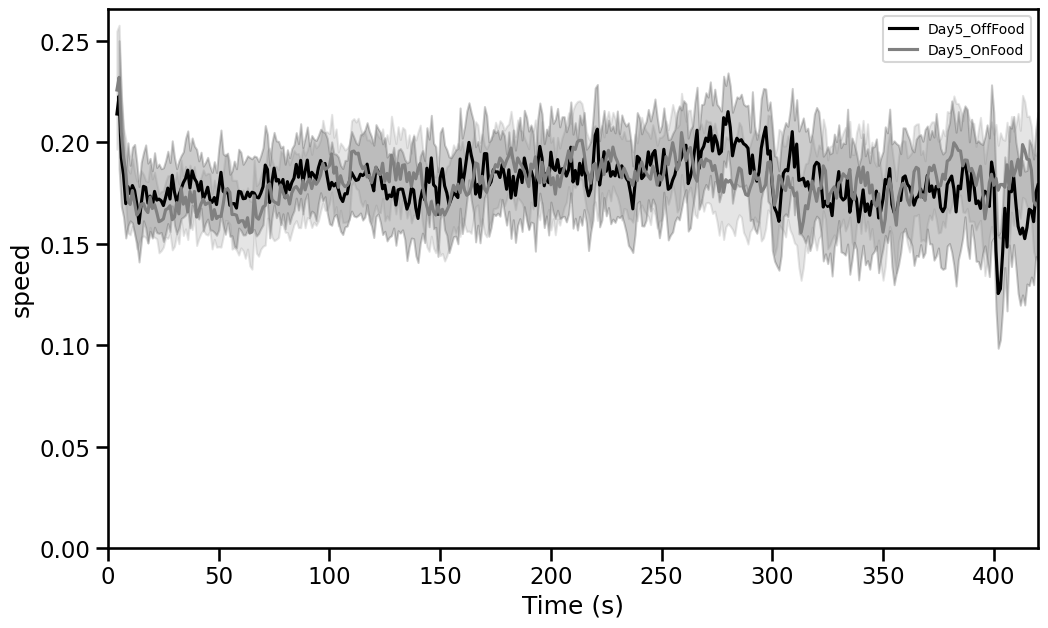

In [20]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = day5,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        # '#FF00FF',
                        # '#8B008B',
                        # 'green',
                        # 'lightgreen',
                        # 'royalblue',
                        # 'lightblue',
                        # '#FFB5C5',
                        # '#CD6889',
                        # 'maroon',
                        # 'firebrick'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [ ]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1)
# print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False)
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'])
speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

In [ ]:
print(speed_diff.iloc[0,1])

In [ ]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

## Making the bar plot

In [ ]:
Title = "BSR Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = speed_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.1)
plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

In [ ]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT = AfterOneHundredMean[AfterOneHundredMean.Genotype != "Test"]
AfterOneHundredTEST = AfterOneHundredMean[AfterOneHundredMean.Genotype != "cat-2 (e1112)"]


In [ ]:
print(AfterOneHundredMean)
print(AfterOneHundredCAT)
print(AfterOneHundredTEST)

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)